<a href="https://colab.research.google.com/github/Quantum-Intelligence-Frontier/dldna/blob/main/notebooks/ko/part_1/03_딥러닝프레임워크.ipynb" target="_parent">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 3. 딥러닝 프레임워크

> "도구는, 도구를 만드는 자만큼 훌륭하다." - *익명, 그러나 폰 노이만으로 자주 인용됨*

딥러닝의 역사에서 프레임워크의 발전은 매우 중요합니다. 2012년 AlexNet의 성공 이후 다양한 프레임워크가 등장했습니다. Caffe, Theano, Torch7 등을 거쳐 현재는 PyTorch와 TensorFlow가 주류를 이루고 있습니다.

2010년대 초반, 딥러닝은 이미지 인식, 음성 인식 등 여러 분야에서 기존 기술을 뛰어넘는 놀라운 성과를 보이기 시작했습니다. 하지만 딥러닝 모델을 훈련하고 배포하는 것은 여전히 어려운 일이었습니다. 신경망 구성, 기울기 계산, GPU 가속 등을 직접 구현해야 했기 때문입니다. 이러한 복잡성은 딥러닝 연구의 진입 장벽을 높이고, 연구 속도를 늦추는 요인이었습니다. 이러한 문제를 해결하기 위해 딥러닝 프레임워크가 등장했습니다. 딥러닝 프레임워크는 신경망 모델 구축, 훈련, 배포를 위한 고수준 API와 도구를 제공하여 개발 과정을 단순화하고 가속화했습니다. 초기에는 Theano, Caffe, Torch와 같은 프레임워크가 등장하여 학계와 산업계에서 널리 사용되었습니다.
 
2015년, 구글은 텐서플로우(TensorFlow)를 오픈소스로 공개하면서 딥러닝 프레임워크 생태계에 큰 변화를 가져왔습니다. 텐서플로우는 유연한 아키텍처, 강력한 시각화 도구, 대규모 분산 학습 지원 등을 통해 빠르게 인기를 얻었습니다. 2017년, 페이스북은 파이토치(PyTorch)를 공개하며 또 다른 중요한 이정표를 세웠습니다. 파이토치는 동적 계산 그래프, 직관적인 인터페이스, 뛰어난 디버깅 기능을 제공하여 연구자들 사이에서 빠르게 확산되었습니다.

현재 딥러닝 프레임워크는 단순한 도구를 넘어, 딥러닝 연구와 개발의 핵심 인프라로 자리 잡았습니다. 자동 미분, GPU 가속, 모델 병렬화, 분산 학습 등 핵심 기능을 제공하며, 새로운 모델과 알고리즘 개발을 가속화하고 있습니다. 또한, 프레임워크 간의 경쟁과 협력은 딥러닝 생태계를 더욱 발전시키고 있습니다.


## 3.1 파이토치

PyTorch는 Torch 라이브러리를 기반으로 하는 오픈 소스 머신 러닝 프레임워크로, 컴퓨터 비전 및 자연어 처리와 같은 응용 프로그램에 사용됩니다. 2016년 Facebook의 AI Research lab (FAIR)에서 Torch7을 Python으로 재구현하면서 핵심 프레임워크로 개발되었습니다. 동적 계산 그래프와 직관적인 디버깅 기능 덕분에 연구자들 사이에서 빠르게 인기를 얻었습니다. PyTorch 외에도 TensorFlow, JAX, Caffe와 같은 다른 프레임워크가 있지만, PyTorch는 연구 분야에서 사실상의 표준이 되었습니다. 많은 새로운 모델들이 종종 PyTorch 구현과 함께 출시됩니다.

하나의 프레임워크에 능숙해진 후 다른 프레임워크의 장점을 활용하는 것도 좋은 전략입니다. 예를 들어, TensorFlow의 데이터 전처리 파이프라인이나 JAX의 함수형 변환 기능을 PyTorch와 함께 사용할 수 있습니다.

In [ ]:
!pip install dldna[colab] # in Colab
# !pip install dldna[all] # in your local

In [1]:
import torch

# Print PyTorch version
print(f"PyTorch version: {torch.__version__}")

# Set the random seed for reproducibility
torch.manual_seed(7)

PyTorch version: 2.6.0+cu124


난수를 생성할 때 초기 시드 값을 설정하면 매번 동일한 난수를 얻을 수 있습니다. 이는 반복되는 훈련에서 일관된 결과를 보장하기 위해 연구에서 흔히 사용됩니다.

### 3.1.1 텐서 객체

> **도전과제**: GPU를 활용하여 대규모 행렬 연산을 어떻게 효율적으로 수행할 수 있을까?
>
> **연구자의 고뇌**: 딥러닝 모델의 크기가 커지면서, CPU만으로는 학습과 추론에 너무 많은 시간이 걸렸습니다. GPU는 병렬 연산에 특화되어 딥러닝에 적합했지만, GPU 프로그래밍은 복잡하고 어려웠습니다. 딥러닝 연구자들이 GPU를 쉽게 활용할 수 있도록, GPU 연산을 추상화하고 자동화하는 도구가 필요했습니다.

텐서는 PyTorch의 기본 데이터 구조입니다. 2006년 CUDA가 등장한 이후 GPU 연산이 딥러닝의 핵심이 되었고, 텐서는 이러한 GPU 연산을 효율적으로 수행할 수 있도록 설계되었습니다. 텐서는 스칼라, 벡터, 행렬을 일반화한 다차원 배열입니다. 딥러닝에서는 데이터의 차원(텐서 랭크)이 매우 다양합니다. 예를 들어, 이미지는 (배치, 채널, 높이, 너비)의 4차원 텐서로, 자연어는 (배치, 시퀀스 길이, 임베딩 차원)의 3차원 텐서로 표현됩니다. 2장에서 살펴본 것처럼 이러한 차원을 자유자재로 변형하고 가공하는 것이 중요합니다.

다음과 같이 텐서를 선언할 수 있습니다.

In [2]:
import numpy as np
import torch

# Create a 3x2x4 tensor with random values
a = torch.Tensor(3, 2, 4)
print(a)

tensor([[[ 1.1210e-44,  0.0000e+00,  0.0000e+00,  4.1369e-41],
         [ 1.8796e-17,  0.0000e+00,  2.8026e-45,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,         nan,         nan],
         [ 6.3058e-44,  4.7424e+30,  1.4013e-45,  1.3563e-19]],

        [[ 1.0089e-43,  0.0000e+00,  1.1210e-44,  0.0000e+00],
         [-8.8105e+09,  4.1369e-41,  1.8796e-17,  0.0000e+00]]])


기존 데이터로부터도 텐서를 초기화할 수 있습니다.

In [4]:
# From a Python list
d = [[1, 2], [3, 4]]
print(f"Type of d: {type(d)}")

a = torch.Tensor(d)  # Creates a *copy*
print(f"Tensor a:\n{a}")
print(f"Type of a: {type(a)}")

# From a NumPy array
d_np = np.array(d)
print(f"Type of d_np: {type(d_np)}")

b = torch.from_numpy(d_np) # Shares memory with d_np (zero-copy)
print(f"Tensor b (from_numpy):\n{b}")


c = torch.Tensor(d_np)  # Creates a *copy*
print(f"Tensor c (from np array using torch.Tensor):\n{c}")

# Example of memory sharing with torch.from_numpy
d_np[0, 0] = 100
print(f"Modified d_np:\n{d_np}")
print(f"Tensor b (from_numpy) after modifying d_np:\n{b}")
print(f"Tensor c (copy) after modifying d_np:\n{c}")

Type of d: <class 'list'>
Tensor a:
tensor([[1., 2.],
        [3., 4.]])
Type of a: <class 'torch.Tensor'>
Type of d_np: <class 'numpy.ndarray'>
Tensor b (from_numpy):
tensor([[1, 2],
        [3, 4]])
Tensor c (from np array using torch.Tensor):
tensor([[1., 2.],
        [3., 4.]])
Modified d_np:
[[100   2]
 [  3   4]]
Tensor b (from_numpy) after modifying d_np:
tensor([[100,   2],
        [  3,   4]])
Tensor c (copy) after modifying d_np:
tensor([[1., 2.],
        [3., 4.]])


출력했을 때 같아 보인다고 해서 같은 객체인 것은 아닙니다. `d`는 파이썬 리스트 객체이고, 텐서는 다양한 데이터 구조로부터 생성될 수 있습니다. 특히 NumPy 배열과의 상호 작용은 매우 효율적입니다. 그러나 리스트 객체와 NumPy 배열은 GPU를 지원하지 않으므로 대규모 연산에는 텐서로의 변환이 필수적입니다. *중요한* 점은 `torch.Tensor(data)`와 `torch.from_numpy(data)`의 차이점을 이해하는 것입니다. 전자는 *항상* 복사본을 생성하는 반면, 후자는 원본 NumPy 배열과 메모리를 공유하는 *뷰*를 생성합니다(가능한 경우 - 제로 카피). NumPy 배열을 수정하면 `from_numpy`로 생성된 텐서도 변경되며, 그 반대도 마찬가지입니다.

텐서를 초기화하는 방법은 매우 다양합니다. 2006년 Hinton의 논문 이후 초기화 방법의 중요성이 부각되었고 다양한 초기화 전략이 개발되었습니다. 가장 기본적인 초기화 함수는 다음과 같습니다.

*   `torch.zeros`: 0으로 초기화합니다.
*   `torch.ones`: 1로 초기화합니다.
*   `torch.rand`: 0과 1 사이의 균일 분포에서 난수로 초기화합니다.
*   `torch.randn`: 표준 정규 분포(평균 0, 분산 1)에서 난수로 초기화합니다.
*   `torch.arange`: n, n+1, n+2, ... 와 같이 순차적으로 초기화합니다.

In [5]:
shape = (2, 3)

rand_t = torch.rand(shape)     # Uniform distribution [0, 1)
randn_t = torch.randn(shape)   # Standard normal distribution
ones_t = torch.ones(shape)
zeros_t = torch.zeros(shape)

print(f"Random tensor (uniform):\n{rand_t}")
print(f"Random tensor (normal):\n{randn_t}")
print(f"Ones tensor:\n{ones_t}")
print(f"Zeros tensor:\n{zeros_t}")

Random tensor (uniform):
tensor([[0.5349, 0.1988, 0.6592],
        [0.6569, 0.2328, 0.4251]])
Random tensor (normal):
tensor([[-1.2514, -1.8841,  0.4457],
        [-0.7068, -1.5750, -0.6318]])
Ones tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.]])
Zeros tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.]])


PyTorch는 100개 이상의 텐서 연산을 지원하며, 이들 모두 GPU에서 실행할 수 있습니다. 텐서는 기본적으로 CPU 메모리에 생성되므로, GPU를 사용하려면 `to()` 함수를 사용하여 명시적으로 이동해야 합니다. 대규모 텐서를 CPU와 GPU 간에 이동하는 데는 상당한 비용이 발생하므로 신중한 메모리 관리가 필수적입니다. 실제 딥러닝 훈련에서 GPU의 메모리 대역폭은 성능에 결정적인 영향을 미칩니다. 예를 들어, 트랜스포머 모델을 훈련할 때 GPU 메모리가 클수록 더 큰 배치 크기를 사용할 수 있어 훈련 효율성이 높아집니다. 그러나 고대역폭 메모리는 생산 비용이 매우 높아 GPU 가격의 상당 부분을 차지합니다. CPU와 GPU 텐서 연산의 성능 차이는 특히 행렬 곱셈과 같이 병렬화 가능한 연산에서 두드러집니다. 이러한 이유로 현대 딥러닝에서는 GPU, TPU, NPU와 같은 전용 가속기가 필수적입니다.

In [6]:
# Device setting
if torch.cuda.is_available():
    tensor = zeros_t.to("cuda")
    device = "cuda:0"
else:
    device = "cpu"
    print('GPU not available')

# CPU/GPU performance comparison
import time

# CPU operation
x = torch.rand(10000, 10000)
start = time.time()
torch.matmul(x, x)
cpu_time = time.time() - start
print(f"CPU computation time = {cpu_time:3.2f} seconds")

# GPU operation
if device != "cpu":
    x = x.to(device)
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)

    start.record()
    torch.matmul(x, x)
    end.record()
    torch.cuda.synchronize()  # Wait for all operations to complete
    gpu_time = start.elapsed_time(end) / 1000  # Convert milliseconds to seconds
    print(f"GPU computation time = {gpu_time:3.2f} seconds")
    print(f"GPU is {cpu_time / gpu_time:3.1f} times faster.")

CPU computation time = 2.34 seconds
GPU computation time = 0.14 seconds
GPU is 16.2 times faster.


NumPy와 텐서 간의 변환은 매우 효율적으로 구현됩니다. 특히, 위에서 보았듯이 `torch.from_numpy()`를 사용하면 메모리 복사 없이 메모리가 공유됩니다.

In [7]:
np_a = np.array([[1, 1], [2, 3]])
tensor_a = torch.from_numpy(np_a)
np_b = tensor_a.numpy() # Shares memory.  If tensor_a is on CPU.

print(f"NumPy array: {np_a}")
print(f"Tensor: {tensor_a}")
print(f"NumPy array from Tensor: {np_b}") #if tensor_a is on CPU.

NumPy array: [[1 1]
 [2 3]]
Tensor: tensor([[1, 1],
        [2, 3]])
NumPy array from Tensor: [[1 1]
 [2 3]]


텐서를 NumPy로 변환할 때는 텐서가 반드시 CPU에 있어야 합니다. GPU에 있는 텐서는 먼저 `.cpu()`를 사용하여 CPU로 이동해야 합니다. 텐서의 기본 속성은 `shape`, `dtype`, `device`이며, 이를 통해 텐서의 모양과 저장 위치를 확인할 수 있습니다.

In [18]:
a = torch.rand(2, 3)
print(f"Shape = {a.shape}")
print(f"Data type = {a.dtype}")
print(f"Device = {a.device}")

Shape = torch.Size([2, 3])
Data type = torch.float32
Device = cpu


인덱싱과 슬라이싱은 넘파이와 동일한 문법을 사용합니다.

In [19]:
a = torch.rand(3, 3)
print(f"Tensor a:\n{a}")
print(f"First row: {a[0]}")
print(f"First column: {a[:, 0]}")
print(f"Last column: {a[..., -1]}")  # Equivalent to a[:, -1]

Tensor a:
tensor([[0.2069, 0.8296, 0.4973],
        [0.9265, 0.8386, 0.6611],
        [0.5329, 0.7822, 0.0975]])
First row: tensor([0.2069, 0.8296, 0.4973])
First column: tensor([0.2069, 0.9265, 0.5329])
Last column: tensor([0.4973, 0.6611, 0.0975])


### 3.1.2 오퍼레이션

PyTorch는 NumPy의 거의 모든 연산을 지원합니다. 1964년 APL 언어에서 시작된 다차원 배열 연산의 전통이 NumPy를 거쳐 PyTorch에도 이어지고 있습니다. PyTorch 공식 문서([PyTorch documentation]([https://pytorch.org/docs/stable/tensors.html))에서 지원하는 모든 연산 목록을 확인할 수 있습니다.

텐서의 형상 변경은 신경망에서 가장 빈번하게 사용되는 연산 중 하나입니다. `view()` 함수를 통해 텐서의 차원을 변경할 수 있으며, 이때 전체 요소의 개수는 유지되어야 합니다. `permute()` 함수는 차원의 순서를 재배열합니다.

In [20]:
a = torch.arange(12)
print(f"a: {a}")

x = a.view(3, 4)  # Reshape to 3x4
print(f"x: {x}")

y = x.permute(1, 0)  # Swap dimensions 0 and 1
print(f"y: {y}")

b = torch.randn(2, 3, 5)
print(f"b shape: {b.shape}")

z = b.permute(2, 0, 1)  # Change dimension order to (2, 0, 1)
print(f"z shape: {z.shape}")

a: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
x: tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
y: tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])
b shape: torch.Size([2, 3, 5])
z shape: torch.Size([5, 2, 3])


행렬 연산은 딥러닝의 핵심이며, PyTorch는 다양한 행렬 연산 함수를 제공합니다.

1.  `torch.matmul`: 일반적인 행렬 연산을 수행합니다. 차원에 따라 다음과 같이 동작합니다.
    *   1차원 × 1차원: 내적(dot product)
    *   2차원 × 2차원: 행렬곱
    *   1차원 × 2차원: 첫 텐서에 차원 1을 추가한 후 행렬곱
    *   N차원 × M차원: 브로드캐스팅 후 행렬곱
2.  `torch.mm`: 순수 행렬곱 연산(브로드캐스팅 미지원)
3.  `torch.bmm`: 배치 차원을 포함한 행렬곱 ((b, i, k) × (b, k, j) → (b, i, j))
4.  `torch.einsum`: 아인슈타인 합 표기법을 사용한 텐서 연산. 복잡한 텐서 연산을 간결하게 표현할 수 있습니다. (자세한 내용은 "이론 딥다이브" 참고)
    -   `torch.einsum('ij,jk->ik', a, b)`: 행렬 a와 b의 곱

In [21]:
a = torch.arange(6)
b = torch.arange(12)

X = a.view(2, 3)
Y = b.view(3, 4)
print(f"X: {X}")
print(f"Y: {Y}")

# matmul (2,3) X (3,4) -> (2, 4)
print(f"X @ Y = {torch.matmul(X, Y)}")

# Using torch.einsum for matrix multiplication
einsum_result = torch.einsum('ij,jk->ik', X, Y)
print(f"X @ Y (using einsum) = {einsum_result}")


a = torch.arange(2)
b = torch.arange(2)
print(f"a: {a}")
print(f"b: {b}")

# Vector x Vector operation
print(f"a @ b = {torch.matmul(a, b)}")

# 1D tensor (vector), 2D tensor (matrix) operation
# (2) x (2,2) is treated as (1,2) x (2,2) for matrix multiplication.
# Result: (1,2) x (2,2) -> (1,2)
b = torch.arange(4)
B = b.view(2, 2)
print(f"a: {a}")
print(f"B: {B}")
print(f"a @ B = {torch.matmul(a, B)}")

# Matrix x Vector operation
X = torch.randn(3, 4)
b = torch.randn(4)
print(f"X @ b shape = {torch.matmul(X, b).size()}")

# Batched matrix x Batched matrix
# The leading batch dimension is maintained.
# The 2nd and 3rd dimensions are treated as matrices for multiplication.
X = torch.arange(18).view(3, 2, 3)
Y = torch.arange(18).view(3, 3, 2)
print(f"X: {X}")
print(f"Y: {Y}")
# Batch dimension remains the same, and (2,3)x(3,2) -> (2,2)
print(f"X @ Y shape: {torch.matmul(X, Y).size()}")
print(f"X @ Y: {torch.matmul(X, Y)}")

# Batched matrix x Broadcasted matrix
X = torch.arange(18).view(3, 2, 3)
Y = torch.arange(6).view(3, 2)
print(f"X: {X}")
print(f"Y: {Y}")
# The second matrix lacks a batch dimension.
# It's broadcasted to match the batch dimension of the first matrix (repeated 3 times).
print(f"X @ Y shape: {torch.matmul(X, Y).size()}")
print(f"X @ Y: {torch.matmul(X, Y)}")


# Using torch.einsum for matrix multiplication
X = torch.arange(6).view(2, 3)
Y = torch.arange(12).view(3, 4)
einsum_result = torch.einsum('ij,jk->ik', X, Y)  # Equivalent to torch.matmul(X, Y)
print(f"X @ Y (using einsum) = {einsum_result}")

X: tensor([[0, 1, 2],
        [3, 4, 5]])
Y: tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
X @ Y = tensor([[20, 23, 26, 29],
        [56, 68, 80, 92]])
X @ Y (using einsum) = tensor([[20, 23, 26, 29],
        [56, 68, 80, 92]])
a: tensor([0, 1])
b: tensor([0, 1])
a @ b = 1
a: tensor([0, 1])
B: tensor([[0, 1],
        [2, 3]])
a @ B = tensor([2, 3])
X @ b shape = torch.Size([3])
X: tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])
Y: tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])
X @ Y shape: torch.Size([3, 2, 2])
X @ Y: tensor([[[ 10,  13],
         [ 28,  40]],

        [[172, 193],
         [244, 274]],

        [[550, 589],
         [676, 724]]])
X: tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 

`torch.einsum`은 아인슈타인 표기법을 사용하여 텐서 연산을 표현합니다.  `'ij,jk->ik'`는  `X` 텐서의 `(i, j)` 차원과 `Y` 텐서의 `(j, k)` 차원을 곱하여 `(i, k)` 차원의 결과를 생성하라는 의미입니다. 이는 행렬 곱셈 `torch.matmul(X, Y)`와 동일한 결과를 나타냅니다.  `einsum`은 이 외에도 전치, 합, 내적, 외적, 배치 행렬 곱 등 다양한 연산을 지원합니다. 더 자세한 내용은 PyTorch 문서를 참조하시기 바랍니다.

In [22]:
# Other einsum examples

# Transpose
a = torch.randn(2, 3)
b = torch.einsum('ij->ji', a)  # Swap dimensions

# Sum of all elements
a = torch.randn(2, 3)
b = torch.einsum('ij->', a)  # Sum all elements

# Batch matrix multiplication
a = torch.randn(3, 2, 5)
b = torch.randn(3, 5, 3)
c = torch.einsum('bij,bjk->bik', a, b) # Batch matrix multiplication

::: {.callout-note collapse="true" title="클릭하여 내용 보기(딥다이브 : 아인슈타인 표기법과 torch.einsum)"}

## 아인슈타인 표기법과 torch.einsum

### 아인슈타인 표기법 (Einstein Notation)

아인슈타인 표기법(Einstein Notation, 또는 Einstein Summation Convention)은 1916년 알베르트 아인슈타인이 일반 상대성 이론을 기술하면서 도입한 표기법입니다. 원래는 물리학, 특히 상대성 이론의 수식을 간결하게 표현하기 위해 고안되었지만, 그 편리함과 표현력 덕분에 텐서 연산을 다루는 다양한 분야에서 널리 사용되고 있습니다.

**핵심 아이디어:**

  * **반복되는 인덱스는 합을 의미한다:** 하나의 항(term)에서 같은 인덱스가 두 번 나타나면, 해당 인덱스에 대해 *모든 가능한 값*을 더한다(summation)는 것을 암시합니다. 명시적인 합 기호($\\sum$)를 생략하여 표기를 간결하게 만듭니다.
  * **자유 인덱스와 더미 인덱스:**
      * **자유 인덱스 (free index):** 결과 텐서에 나타나는 인덱스. 각 항에서 한 번만 나타납니다.
      * **더미 인덱스 (dummy index):** 합산되는 인덱스. 하나의 항에서 두 번 나타납니다. (summation index, bound index)

**기본 규칙**

1.  **같은 인덱스가 한 항에 두 번 나타나면, 해당 인덱스에 대해 합산합니다.**
2.  **자유 인덱스는 결과 텐서의 차원을 결정합니다.**
3.  **더미 인덱스는 내부 계산에만 사용되고 결과에는 나타나지 않습니다.**
4.  **인덱스 문자는 임의로 선택할 수 있지만, 혼동을 피하기 위해 일관성을 유지하는 것이 좋습니다.** (관례적으로 $i, j, k, l, m, n$ 등을 사용)
5.  **화살표($\\rightarrow$)의 왼쪽**은 입력 텐서, **오른쪽**은 출력 텐서를 나타냅니다.

**예시**

  * **벡터 내적 (dot product):** $a\_i b\_i$ ($\\sum\_i a\_i b\_i$ 와 동일)
  * **행렬 곱셈 (matrix multiplication):** $A\_{ij} B\_{jk} = C\_{ik}$ ($\\sum\_j A\_{ij}B\_{jk}$ 와 동일)
  * **전치 (transpose):** $A\_{ij} = B\_{ji}$ (B는 A의 전치 행렬)
  * **대각합 (trace):** $A\_{ii}$ ($\\sum\_i A\_{ii}$ 와 동일)
  * **외적 (outer product):** $a\_i b\_j = C\_{ij}$
  * **원소별 곱(element-wise multiplication):** $A\_{ij}B\_{ij} = C\_{ij}$ (Hadamard product)

**딥러닝에서의 활용 예시**

  * **배치 행렬 곱셈 (batched matrix multiplication):** $A\_{bij} B\_{bjk} = C\_{bik}$ ($b$: 배치 차원)
  * **어텐션 메커니즘 (attention mechanism):** $e\_{ij} = Q\_{ik} K\_{jk}$, $a\_{ij} = \\text{softmax}(e\_{ij})$, $v\_{i} = a\_{ij} V\_{j}$ ($Q$: 쿼리, $K$: 키, $V$: 값)
  * **양선형 변환 (bilinear transformation):** $x\_i W\_{ijk} y\_j = z\_k$
  * **다차원 컨볼루션 (convolution):** $I\_{b,c,i,j} \* F\_{o,c,k,l} = O\_{b,o,i',j'}$ ($b$: 배치, $c$: 입력 채널, $o$: 출력 채널, $i, j$: 입력 공간 차원, $k, l$: 필터 공간 차원)
  * **배치 정규화 (Batch Normalization):** $\\gamma\_c \* \\frac{x\_{b,c,h,w} - \\mu\_c}{\\sigma\_c} + \\beta\_c$ ($c$: 채널 차원, $b$:배치, $h$:높이, $w$:너비)
  * **RNN hidden state update**: $h\_t = \\tanh(W\_{ih}x\_t + b\_{ih} + W\_{hh}h\_{t-1} + b\_{hh})$ ($h$: hidden, $x$: input, $W$: weight, $b$: bias)
  * **LSTM cell state update**: $c\_t = f\_t \* c\_{t-1} + i\_t \* \\tilde{c}\_t$ ($c$: cell state, $f$: forget gate, $i$: input gate, $\\tilde{c}\_t$: candidate cell state)

### torch.einsum

`torch.einsum`은 PyTorch에서 아인슈타인 표기법을 사용하여 텐서 연산을 수행하는 함수입니다. `einsum`은 "Einstein summation"의 약자입니다.

**사용법:**

```python
torch.einsum(equation, *operands)
```

  * `equation`: 아인슈타인 표기법 문자열. `'ij,jk->ik'` 와 같은 형태입니다.
  * `*operands`: 연산에 참여하는 텐서들 (가변 인자).

**장점**

  * **간결성:** 복잡한 텐서 연산을 한 줄의 코드로 표현할 수 있습니다.
  * **가독성:** 아인슈타인 표기법은 텐서 연산의 의미를 명확하게 드러냅니다.
  * **유연성:** 다양한 텐서 연산을 조합하여 새로운 연산을 쉽게 정의할 수 있습니다.
  * **최적화:** PyTorch는 `einsum` 연산을 자동으로 최적화하여 효율적으로 계산합니다. (경우에 따라) 수동으로 구현한 연산보다 빠를 수 있습니다. BLAS, cuBLAS와 같은 라이브러리의 최적화된 루틴을 활용하거나, 연산 순서를 최적화합니다.
  * **자동 미분 지원**: `einsum`으로 정의된 연산은 PyTorch의 자동 미분 시스템과 완벽하게 호환됩니다.

**torch.einsum 예:**

```python
import torch

# 행렬 곱셈
A = torch.randn(3, 4)
B = torch.randn(4, 5)
C = torch.einsum('ij,jk->ik', A, B)  # C = A @ B

# 전치
A = torch.randn(3, 4)
B = torch.einsum('ij->ji', A)  # B = A.T

# 대각합
A = torch.randn(3, 3)
trace = torch.einsum('ii->', A)  # trace = torch.trace(A)

# 배치 행렬 곱셈
A = torch.randn(2, 3, 4)
B = torch.randn(2, 4, 5)
C = torch.einsum('bij,bjk->bik', A, B) # C = torch.bmm(A, B)

# 외적
a = torch.randn(3)
b = torch.randn(4)
C = torch.einsum('i,j->ij', a, b) # C = torch.outer(a, b)

# 원소별 곱
A = torch.randn(2,3)
B = torch.randn(2,3)
C = torch.einsum('ij,ij->ij', A, B) # C = A * B

# 양선형 변환
x = torch.randn(3)
W = torch.randn(5, 3, 4)
y = torch.randn(4)
z = torch.einsum('i,ijk,j->k', x, W, y) # z_k = sum_i sum_j x_i * W_{ijk} * y_j

# 다차원 텐서 축소
tensor = torch.randn(3, 4, 5, 6)
result = torch.einsum('...ij->...i', tensor)  # 마지막 두 차원에 대해 합산
```

**`torch.einsum` vs. 다른 연산:**

| 연산                    | `torch.einsum`           | 다른 방법                                   |
| :---------------------- | :----------------------- | :------------------------------------------ |
| 행렬 곱셈                | `'ij,jk->ik'`           | `torch.matmul(A, B)` 또는 `A @ B`          |
| 전치                    | `'ij->ji'`           | `torch.transpose(A, 0, 1)` 또는 `A.T`        |
| 대각합                  | `'ii->'`              | `torch.trace(A)`                            |
| 배치 행렬 곱셈            | `'bij,bjk->bik'`        | `torch.bmm(A, B)`                           |
| 내적                    | `'i,i->'`              | `torch.dot(a, b)`                            |
| 외적                    | `'i,j->ij'`           | `torch.outer(a, b)`                          |
| 원소별 곱                | `'ij,ij->ij'`          | `A * B`                                      |
| 텐서 축소 (sum, mean 등) | `'ijk->i'` (예시)      | `torch.sum(A, dim=(1, 2))`                   |

**`torch.einsum`의 한계**

  * **초기 학습 곡선:** 아인슈타인 표기법에 익숙하지 않은 사용자에게는 처음에는 다소 어려울 수 있습니다.
  * **복잡한 연산의 가독성:** 매우 복잡한 연산의 경우, `einsum` 문자열이 길어져 오히려 가독성이 떨어질 수 있습니다. 이 경우, 연산을 여러 단계로 나누거나, 주석을 활용하는 것이 좋습니다.
  * **모든 연산 표현 불가:** `einsum`은 선형 대수 연산을 기반으로 하기 때문에, 비선형 연산(예: `max`, `min`, `sort`)이나 조건부 연산은 직접 표현할 수 없습니다. 이 경우, 다른 PyTorch 함수와 함께 사용해야 합니다.

**`einsum` 최적화 (`torch.compile`)**

`torch.compile` (PyTorch 2.0 이상)은 `einsum` 연산을 더욱 최적화할 수 있습니다. `compile`은 JIT(Just-In-Time) 컴파일을 통해 코드를 분석하고, 텐서 연산을 융합하거나, 메모리 접근 패턴을 최적화하는 등 다양한 최적화를 수행합니다.

```python
import torch
# PyTorch 2.0 이상에서 사용 가능

@torch.compile
def my_einsum_function(a, b):
    return torch.einsum('ij,jk->ik', a, b)

# 처음 호출 시 컴파일, 이후 호출 시 최적화된 코드 실행
result = my_einsum_function(torch.randn(10, 20), torch.randn(20, 30))

```

**결론:**

아인슈타인 표기법과 `torch.einsum`은 딥러닝에서 복잡한 텐서 연산을 간결하고 효율적으로 표현하고 계산하는 강력한 도구입니다. 처음에는 다소 낯설 수 있지만, 익숙해지면 코드의 가독성과 효율성을 크게 향상시킬 수 있습니다. 특히, 트랜스포머 모델과 같이 복잡한 텐서 연산이 많은 딥러닝 모델을 다룰 때 그 진가를 발휘합니다. `torch.compile`과 함께 사용하면 성능을 더욱 향상시킬 수 있습니다.

**레퍼런스:**

1.  **Einstein Notation:** [https://en.wikipedia.org/wiki/Einstein\_notation](https://www.google.com/url?sa=E&source=gmail&q=https://en.wikipedia.org/wiki/Einstein_notation)
2.  **`torch.einsum` documentation:** [https://pytorch.org/docs/stable/generated/torch.einsum.html](https://www.google.com/url?sa=E&source=gmail&q=https://pytorch.org/docs/stable/generated/torch.einsum.html)
3.  **A basic introduction to NumPy's einsum:** [https://ajcr.net/Basic-guide-to-einsum/](https://www.google.com/url?sa=E&source=gmail&q=https://ajcr.net/Basic-guide-to-einsum/)
4.  **Einsum is All You Need - Einstein Summation in Deep Learning:** [https://rockt.github.io/2018/04/30/einsum](https://www.google.com/url?sa=E&source=gmail&q=https://rockt.github.io/2018/04/30/einsum)

:::


### 3.1.3 그래디언트 연산을 위한 계산 그래프

자동 미분(Automatic Differentiation)은 1970년대부터 연구되었지만, 2015년 이후 딥러닝의 발전과 함께 크게 주목받게 되었습니다. PyTorch는 동적 계산 그래프(dynamic computation graph)를 통해 자동 미분을 구현하며, 이는 2장에서 살펴본 연쇄 법칙(chain rule)의 실제 구현체입니다.

PyTorch의 자동 미분은 각 연산 단계마다 그래디언트를 추적하고 저장할 수 있습니다. 이를 위해서는 텐서에 그래디언트 추적을 명시적으로 선언해야 합니다.

In [23]:
a = torch.randn((2,))
print(f"a.requires_grad (default): {a.requires_grad}")  # False (default)

a.requires_grad_(True)  # In-place modification
print(f"a.requires_grad (after setting to True): {a.requires_grad}")  # True

# Declare during creation
x = torch.arange(2, dtype=torch.float32, requires_grad=True)
print(f"x.requires_grad (declared at creation): {x.requires_grad}")

a.requires_grad (default): False
a.requires_grad (after setting to True): True
x.requires_grad (declared at creation): True


예를 들어, 다음과 같은 간단한 손실 함수를 생각해 봅시다. (그림 3-1, 이전 버전 참조)

$$y = \frac {1}{N}\displaystyle\sum_{i}^{N} \{(x_i - 1)^2 + 4) \}$$

$x_i$에 대한 연산은 순차적으로 $a_i = x_i - 1$, $b_i = a_i^2$, $c_i = b_i + 4$, $y = \frac{1}{N}\sum_{i=1}^{N} c_i$ 와 같이 표현할 수 있습니다. 

이 식에 대해 순방향(forward), 역방향(backward) 연산을 수행해 보겠습니다.


In [24]:
a = x - 1
b = a**2
c = b + 4
y = c.mean()

print(f"y = {y}")

# Perform backward operation
y.backward()

# Print the gradient of x (x.grad)
print(f"x.grad = {x.grad}")

y = 4.5
x.grad = tensor([-1.,  0.])


각 단계의 그래디언트를 수식으로 계산하면 다음과 같습니다.

$\frac{\partial a_i}{\partial x_i} = 1, \frac{\partial b_i}{\partial a_i} = 2 \cdot a_i, \frac{\partial c_i}{\partial b_i} = 1,  \frac{\partial y}{\partial c_i} = \frac{1}{N}$

따라서 연쇄 법칙에 의해

$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial  c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i} =  \frac{1}{N} \cdot 1 \cdot 2 \cdot a_i \cdot 1 = \frac{2}{N}a_i = \frac{2}{N}(x_i - 1)$

$x_i$가 \[0, 1]이고, N=2 (x의 원소 개수) 이므로,  $\frac{\partial y}{\partial x_i}  = [-0.5, 0.5]$ 가 됩니다. 이는 PyTorch의 자동 미분 결과와 일치합니다.

PyTorch는 1970년대부터 연구된 자동 미분의 개념을 현대적으로 구현했습니다. 특히 계산 그래프의 동적 생성과 그래디언트 추적 기능은 매우 유용합니다. 그러나 때로는 이러한 자동 미분 기능을 비활성화해야 할 필요가 있습니다.


In [8]:
x = torch.randn(3, 4)
w = torch.randn(4, 2)
b = torch.randn(2)

# If gradient tracking is needed
z = torch.matmul(x, w) + b
z.requires_grad_(True)  # Can also be set using requires_grad_()
print(f"z.requires_grad: {z.requires_grad}")

# Disable gradient tracking method 1: Using 'with' statement
with torch.no_grad():
    z = torch.matmul(x, w) + b
    print(f"z.requires_grad (inside no_grad): {z.requires_grad}")

# Disable gradient tracking method 2: Using detach()
z_det = z.detach()
print(f"z_det.requires_grad: {z_det.requires_grad}")

z.requires_grad: True
z.requires_grad (inside no_grad): False
z_det.requires_grad: False


그래디언트 추적 비활성화는 다음과 같은 경우에 특히 유용합니다.

1.  **추론(Inference) 시**: 순전파만 필요한 경우 메모리와 계산 비용을 절감합니다.
2.  **파인튜닝(Fine-tuning)**: 특정 파라미터만 업데이트하고 나머지는 고정할 때 사용합니다.
3.  **성능 최적화**: 역전파는 추가 메모리와 계산 비용이 발생하므로, 필요 없는 경우 비활성화합니다.

특히 대규모 언어 모델의 파인튜닝에서는 대부분의 파라미터를 고정하고 일부만 업데이트하는 것이 일반적이므로, 그래디언트 추적의 선택적 활성화는 매우 중요한 기능입니다.

### 3.1.4 데이터 로딩

데이터 로딩은 딥러닝의 핵심 요소입니다. 2000년대 초반까지는 각 연구팀이 독자적인 데이터 처리 방식을 사용했으나, 2009년 ImageNet과 같은 대규모 데이터셋의 등장으로 표준화된 데이터 로딩 시스템의 필요성이 대두되었습니다.

PyTorch는 데이터 처리와 학습 로직을 분리하기 위해 두 가지 핵심 클래스를 제공합니다.

1.  `torch.utils.data.Dataset`: 데이터와 레이블에 대한 일관된 접근 인터페이스를 제공합니다.  `__len__` 과 `__getitem__` 메서드를 구현해야 합니다.
2.  `torch.utils.data.DataLoader`: 배치(batch) 단위의 효율적인 데이터 로딩 메커니즘을 제공합니다.  `Dataset`을 감싸서 미니배치 생성, 셔플링, 병렬 데이터 로딩 등을 자동화합니다.

다음은 디리클레(Dirichlet) 분포를 사용한 랜덤 데이터 생성 예제입니다.

In [9]:
import torch.utils.data as data
import numpy as np

# Initialize with Dirichlet distribution
a = np.random.dirichlet(np.ones(5), size=2)
b = np.zeros_like(a)
# Generate label values
b = (a == a.max(axis=1)[:, None]).astype(int)

print(f"Data (a):\n{a}")
print(f"Labels (b):\n{b}")


# Create a custom Dataset class by inheriting from PyTorch's Dataset.
class RandomData(data.Dataset):
    def __init__(self, feature, length):
        super().__init__()
        self.feature = feature
        self.length = length
        self.generate_data()

    def generate_data(self):
        x = np.random.dirichlet(np.ones(self.feature), size=self.length)
        y = (x == x.max(axis=1)[:, None]).astype(int)  # One-hot encoding

        self.data = x  # numpy object
        self.label = y

    def __len__(self):
        return self.length

    def __getitem__(self, index):
        # Return data and label as torch tensors
        return torch.tensor(self.data[index], dtype=torch.float32), torch.tensor(self.label[index], dtype=torch.int64)


dataset = RandomData(feature=10, length=100)
print(f"Number of data samples = {len(dataset)}")
print(f"Data at index 0 = {dataset[0]}")
print(f"Data type = {type(dataset[0][0])}")

Data (a):
[[0.46073711 0.01119455 0.28991657 0.11259078 0.12556099]
 [0.07331166 0.43554042 0.1243009  0.13339224 0.23345478]]
Labels (b):
[[1 0 0 0 0]
 [0 1 0 0 0]]
Number of data samples = 100
Data at index 0 = (tensor([1.4867e-01, 1.6088e-01, 1.2207e-02, 3.6049e-02, 1.1054e-04, 8.1160e-02,
        2.9811e-02, 1.9398e-01, 4.9448e-02, 2.8769e-01]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]))
Data type = <class 'torch.Tensor'>


`DataLoader`는 배치 처리를 위한 다양한 기능을 제공합니다. 주요 매개변수는 다음과 같습니다.

*   `batch_size`: 배치당 샘플 수
*   `shuffle`: 데이터 순서 무작위화 (훈련 시 일반적으로 `True`로 설정)
*   `num_workers`: 데이터 로딩 병렬화를 위한 프로세스 수
*   `drop_last`: 마지막 불완전 배치(incomplete batch) 처리 여부 (True면 버림)

`Dataset`으로부터 `__getitem__`을 사용하여 데이터를 읽어들이면서 결과를 텐서 객체로 변환합니다. 특히 `num_workers` 설정은 대규모 이미지나 비디오 데이터셋 처리 시 중요합니다. 그러나 작은 데이터셋의 경우 단일 프로세스가 더 효율적일 수 있습니다. `num_workers` 값을 너무 크게 설정하면 오히려 오버헤드가 발생할 수 있으므로, 적절한 값을 찾는 것이 중요합니다. (일반적으로 코어 수 또는 코어 수 * 2 정도를 시도해 봅니다.)

In [10]:
data_loader = data.DataLoader(dataset, batch_size=4, shuffle=True, num_workers=0)

# Read one batch.
train_x, train_y = next(iter(data_loader))

print(f"1st batch training data = {train_x}, \n Data shape = {train_x.shape}")
print(f"1st batch label data = {train_y}, \n Data shape = {train_y.shape}")
print(f"1st batch label data type = {type(train_y)}")

1st batch training data = tensor([[3.3120e-02, 1.4274e-01, 9.7984e-02, 1.9628e-03, 6.8926e-02, 3.4525e-01,
         4.6966e-02, 6.0947e-02, 4.2738e-02, 1.5937e-01],
        [8.0707e-02, 4.9181e-02, 3.1863e-02, 1.4238e-02, 1.6089e-02, 1.7980e-01,
         1.7544e-01, 1.3465e-01, 1.6361e-01, 1.5442e-01],
        [4.2364e-02, 3.3635e-02, 2.0840e-01, 1.6919e-02, 4.5977e-02, 6.5791e-02,
         1.8726e-01, 1.0325e-01, 2.2029e-01, 7.6117e-02],
        [1.4867e-01, 1.6088e-01, 1.2207e-02, 3.6049e-02, 1.1054e-04, 8.1160e-02,
         2.9811e-02, 1.9398e-01, 4.9448e-02, 2.8769e-01]]), 
 Data shape = torch.Size([4, 10])
1st batch label data = tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]), 
 Data shape = torch.Size([4, 10])
1st batch label data type = <class 'torch.Tensor'>


PyTorch는 도메인별 데이터 처리를 위한 특화된 패키지들을 제공합니다. 2016년 이후 딥러닝이 다양한 분야로 확장되면서, 각 도메인에 특화된 데이터 처리의 필요성이 대두되었습니다.

*   `torchvision`: 컴퓨터 비전
*   `torchaudio`: 오디오 처리
*   `torchtext`: 자연어 처리

Fashion-MNIST는 2017년 Zalando Research에서 공개한 데이터셋으로, MNIST를 대체하기 위해 설계되었습니다. 데이터셋의 구성은 다음과 같습니다.

*   훈련 데이터: 60,000개
*   테스트 데이터: 10,000개
*   이미지 크기: 28x28 그레이스케일

Train data mean: tensor([0.2860]), std: tensor([0.3530])
Label: 5
Label map: Sandal


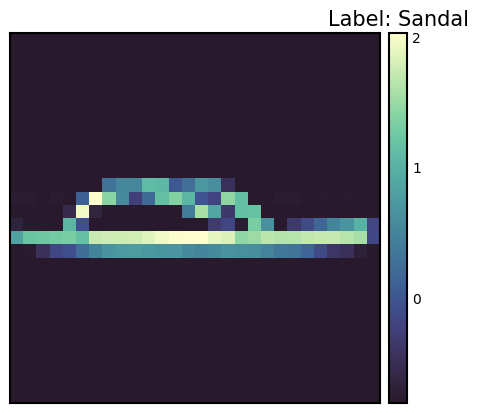

In [11]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Normalize, Compose
import seaborn_image as isns
import matplotlib.pyplot as plt # Added for visualization


# Function to calculate mean and std of the dataset
def calculate_mean_std(dataset):
    dataloader = DataLoader(dataset, batch_size=len(dataset), shuffle=False)
    data, _ = next(iter(dataloader))
    mean = data.mean(axis=(0, 2, 3))  # Calculate mean across channel dimension
    std = data.std(axis=(0, 2, 3))    # Calculate std across channel dimension
    return mean, std


# Datasets.  Note:  We *don't* apply Normalize here yet.
train_dataset = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=ToTensor()
)
test_dataset = datasets.FashionMNIST(
    root="data", train=False, download=True, transform=ToTensor()
)

# Calculate mean and std for normalization
train_mean, train_std = calculate_mean_std(train_dataset)
print(f"Train data mean: {train_mean}, std: {train_std}")

# Now define transforms *with* normalization
transform = Compose([
    ToTensor(),
    Normalize(train_mean, train_std)  # Use calculated mean and std
])

# Re-create datasets with the normalization transform
train_dataset = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=transform
)
test_dataset = datasets.FashionMNIST(
    root="data", train=False, download=True, transform=transform
)


# Check one training data sample.
sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
img, label = train_dataset[sample_idx]  # Use a random index

print(f"Label: {label}")

# Manually create a label map
labels_map = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

print(f"Label map: {labels_map[label]}")

# Plot using seaborn-image.
isns.imgplot(img.squeeze())  # Squeeze to remove channel dimension for grayscale
plt.title(f"Label: {labels_map[label]}") # Add title to plot
plt.show()


# Define data loaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False) # No need to shuffle test data


### 3.1.5 데이터 변환(Transform)

데이터 변환(Data Transform)은 딥러닝에서 매우 중요한 전처리 과정입니다. 2012년 AlexNet의 성공 이후, 데이터 증강(Data Augmentation)이 모델 성능 향상의 핵심 요소로 자리 잡았습니다. PyTorch는 이러한 변환을 위한 다양한 도구를 제공합니다. `transforms.Compose`를 사용하면 여러 변환을 순차적으로 적용할 수 있습니다. 또한 `Lambda` 함수를 통해 사용자 정의 변환도 쉽게 구현할 수 있습니다.

데이터 변환은 모델의 일반화(generalization) 성능을 향상시키는 데 매우 중요합니다. 특히 컴퓨터 비전 분야에서는 다양한 변환을 통한 데이터 증강이 표준 관행이 되었습니다. `Normalize` 변환의 경우, 모델 학습의 안정성을 위해 데이터를 표준화하는 필수적인 단계입니다.

`Normalize` 변환을 적용하기 위해서는 데이터셋의 평균(mean)과 표준편차(standard deviation)를 알아야 합니다. 이를 계산하는 코드는 다음과 같습니다.

In [12]:
from torchvision import transforms
import PIL
import torch
from torch.utils.data import DataLoader
from torchvision import datasets

# Calculate mean and std of the dataset
def calculate_mean_std(dataset):
    dataloader = DataLoader(dataset, batch_size=len(dataset), shuffle=False) # Load all data at once
    data, _ = next(iter(dataloader))
    # For grayscale images, calculate mean and std over height, width dimensions (0, 2, 3)
    # For RGB images, the calculation would be over (0, 1, 2)
    mean = data.mean(dim=(0, 2, 3))  # Calculate mean across batch and spatial dimensions
    std = data.std(dim=(0, 2, 3))    # Calculate std across batch and spatial dimensions
    return mean, std

# --- Example usage with FashionMNIST ---
# 1.  Create dataset *without* normalization first:
train_dataset_for_calc = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=transforms.ToTensor()  # Only ToTensor
)

# 2. Calculate mean and std:
train_mean, train_std = calculate_mean_std(train_dataset_for_calc)
print(f"Train data mean: {train_mean}, std: {train_std}")


# 3.  *Now* create the dataset with normalization:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(train_mean, train_std)  # Use calculated mean and std
])

# Example of defining a custom transform using Lambda
def crop_image(image: PIL.Image.Image) -> PIL.Image.Image:
    # Original image is assumed to be 28x28.
    left, top, width, height = 5, 5, 18, 18 # Example crop parameters
    return transforms.functional.crop(image, top=top, left=left, width=width, height=height)

# Compose transforms, including the custom one and normalization.
transform_with_crop = transforms.Compose([
    transforms.Lambda(crop_image), # Custom cropping
    transforms.ColorJitter(),
    transforms.RandomInvert(),
    transforms.ToTensor(), # Must be *before* Normalize
    transforms.Normalize(train_mean, train_std) # Use calculated mean and std
])

train_dataset_transformed = datasets.FashionMNIST(root="data", train=True, download=True, transform=transform_with_crop)
# Get one sample to check the transformation.
sample_img, sample_label = train_dataset_transformed[0]
print(f"Transformed image shape: {sample_img.shape}")
print(f"Transformed image min/max: {sample_img.min()}, {sample_img.max()}") # Check normalization

Train data mean: tensor([0.2860]), std: tensor([0.3530])
Transformed image shape: torch.Size([1, 18, 18])
Transformed image min/max: -0.8102576732635498, 2.022408962249756


위 코드에서는 먼저 `ToTensor()` 변환만 적용된 데이터셋을 생성하여 평균과 표준편차를 계산합니다. 그 후, 계산된 값을 사용하여 `Normalize` 변환을 포함한 최종 변환을 정의합니다. `Lambda` 함수를 사용하여 사용자 정의 `crop_image` 함수를 변환 파이프라인에 추가하는 예제도 포함되어 있습니다. `ToTensor()`는 `Normalize` *전에* 와야 합니다. `ToTensor()`는 \[0, 255] 범위의 이미지를 \[0, 1] 범위의 텐서로 변환하고, `Normalize`는 이 \[0, 1] 범위의 데이터를 평균 0, 표준편차 1이 되도록 정규화합니다. 데이터 증강은 훈련 데이터에만 적용하고, 검증/테스트 데이터에는 적용하지 않는 것이 일반적입니다.

### 3.1.6 모델

신경망 모델의 구현 방식은 1980년대부터 다양하게 발전해왔습니다. PyTorch는 2016년 출시 때부터 객체 지향적 모델 구현 방식을 채택했으며, 이는 `nn.Module`을 통해 구현됩니다. 이러한 방식은 모델의 재사용성과 확장성을 크게 향상시켰습니다.

모델 클래스는 `nn.Module`을 상속받아 구현하며, 일반적으로 다음과 같은 메서드들을 포함합니다.

*   `__init__()`: 신경망의 구성 요소(층, 활성화 함수 등)를 정의하고 초기화합니다.
*   `forward()`: 입력 데이터를 받아 모델의 순전파 연산을 수행하고 출력(로짓 또는 예측값)을 반환합니다.
*   (선택 사항) `training_step()`, `validation_step()`, `test_step()`: PyTorch Lightning과 같은 라이브러리와 함께 사용할 때, 각 학습/검증/테스트 단계에서의 동작을 정의합니다.
*   (선택 사항) 기타 사용자 정의 메서드: 모델의 특정 기능을 수행하는 메서드들을 추가할 수 있습니다.

In [13]:
from torch import nn

class SimpleNetwork(nn.Module):
    def __init__(self):
        super().__init__()  # Or super(SimpleNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.network_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)  # Flatten the image data into a 1D array
        logits = self.network_stack(x)
        return logits

# Move model to the appropriate device (CPU or GPU)
model = SimpleNetwork().to(device)
print(model)

SimpleNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (network_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


로짓(logit)은 몇 가지 의미를 가집니다.

*   수학적 의미: \[0, 1] 범위의 확률을 \[−∞, ∞] 범위의 실수로 변환하는 함수입니다.
*   딥러닝에서의 의미: 정규화되지 않은(unnormalized) 신경망의 원시 출력값입니다.

흔히 다중 클래스 분류(multi-class classification) 문제에서는 마지막에 `softmax` 함수를 적용해서 레이블과 비교할 수 있는 확률 값으로 변환합니다. 이때 로짓은 `softmax` 함수의 입력값이 됩니다.

모델을 클래스로부터 생성하고 이를 `device`로 전송합니다. GPU가 존재하는 경우에는 GPU 메모리로 모델이 올라갑니다.

In [14]:
x = torch.rand(1, 28, 28, device=device)
logits = model(x)  # Don't call forward() directly!  Call the *model* object.
prediction = nn.Softmax(dim=1)(logits)  # Convert logits to probabilities
y_label = prediction.argmax(1) # Get the predicted class

print(f"Logits: {logits}")
print(f"Prediction probabilities: {prediction}")
print(f"Predicted class: {y_label}")

Logits: tensor([[ 0.0464, -0.0368,  0.0447, -0.0640, -0.0253,  0.0242,  0.0378, -0.1139,
          0.0005,  0.0299]], device='cuda:0', grad_fn=<AddmmBackward0>)
Prediction probabilities: tensor([[0.1052, 0.0968, 0.1050, 0.0942, 0.0979, 0.1029, 0.1043, 0.0896, 0.1005,
         0.1035]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([0], device='cuda:0')


주의할 점은 모델의 `forward()` 메서드를 직접 호출하지 않아야 한다는 것입니다. 대신 모델 객체를 함수처럼 호출하면(`model(x)`) 자동으로 `forward()`가 실행되며, 이는 PyTorch의 자동 미분 시스템과 통합되어 있습니다. 모델 객체의 `__call__` 메소드가 `forward()`를 호출하고, 추가적으로 필요한 작업들(hook 등)을 수행합니다.

### 3.1.7 훈련 

> **도전 과제**: 어떻게 하면 대규모 데이터셋과 복잡한 모델을 효율적으로 학습시킬 수 있을까?
>
> **연구자의 고뇌**: 딥러닝 모델의 성능은 데이터의 양과 질, 그리고 모델의 복잡도에 크게 영향을 받습니다. 하지만 대규모 데이터셋과 복잡한 모델을 학습시키려면 많은 시간과 컴퓨팅 자원이 필요했습니다. 학습 과정을 안정화하고, 과적합을 방지하며, 최적의 하이퍼파라미터를 찾는 것도 어려운 문제였습니다. 이러한 문제를 해결하기 위해, 효율적인 학습 알고리즘, 최적화 기법, 그리고 자동화된 훈련 루프가 필요했습니다.

훈련할 데이터와 모델을 준비하고 나면 실제적인 훈련을 수행합니다. 신경망 모델을 좋은 근사기(approximator)로 만들기 위해서 파라미터를 반복적으로 업데이트 해줘야 합니다. 라벨과 예측값의 차를 계산하는 오차함수(loss function)을 정의하고 최적화기(optimizaer)를 선택해서 파라미터를 지속적으로 업데이트 하면서 오차를 줄여나갑니다. 

훈련을 진행하는 순서는 다음과 같습니다.

1. 데이터셋과 데이터로더 초기화
2. 배치 단위 데이터 로딩
3. 순전파를 통한 예측값 계산
4. 손실 함수를 통한 오차 계산
5. 역전파를 통한 그래디언트 계산
6. 최적화기를 통한 파라미터 업데이트

전체 데이터셋에 대한 1회 반복을 에포크(epoch)라고 하며, 이러한 과정을 여러 에포크 반복하는 것을 훈련 루프라고 합니다.

##### 초매개변수
훈련에는 세 가지 핵심 초매개변수가 필요합니다.

- 에포크(epoch) 수 : 에포크를 몇번 반복할지 정합니다. 통상 과대적합 직전까지만 반복하는 것이 좋습니다.
- 배치 크기 : 모델에 한번에 통과시킬 훈련 데이터의 갯수. 전체 데이터를 통과시키는 것은 GPU 메모리 한계와 메트릭스 연산 시간의 지수적 증가로 비현실 적인 경우가 많습니다. 일부 데이터로 점진적으로 모델 파라미터를 업데이트해서 최적값에 근접시킵니다. 배치 크기가 너무 작으면 변화량이 너무 튀어서 최소값에 근접하기 어려울 수 있습니다. 
- 학습률 : 업데이트될 값의 스케일을 조정합니다. 점진적으로 찾아가는 스텝 사이즈로 비유할 수 있습니다. 통상 작은 값을 가집니다. 다음장에서 학습률과 최적화기의 관계를 살펴봅니다. 

In [15]:
# 3가지 초매개변수
epochs = 10
batch_size = 32
learning_rate = 1e-3 # 최적화기를 위해 앞서 지정했음.

##### 훈련 루프

훈련 루프는 에포크마다 두 단계로 진행됩니다.
1. 훈련 단계: 파라미터 최적화
2. 검증 단계: 성능 평가

2015년 배치 정규화의 등장으로 train()과 eval() 모드의 구분이 중요해졌습니다. eval() 모드에서는 배치 정규화나 드롭아웃과 같은 훈련 전용 연산을 비활성화하여 추론 속도를 향상시킵니다.


##### Loss Function

손실 함수는 신경망 학습의 핵심 요소입니다. 1943년 McCulloch-Pitts 뉴런 모델 이후, 다양한 손실 함수들이 제안되었습니다. 특히 1989년 정보 이론에서 차용한 크로스 엔트로피(Cross-Entropy)의 도입은 딥러닝 발전의 중요한 전환점이 되었습니다.

##### Binary Cross-Entropy (BCE)

이진 분류에서 주로 사용되는 BCE는 다음과 같이 정의됩니다.

$$\mathcal{L} = - \sum_{i} [y_i \log{x_i} + (1-y_i)\log{(1-x_i)}] $$

여기서 $y$는 실제 레이블, $x$는 모델의 예측값이며, 둘 다 [0, 1] 범위를 가집니다.

PyTorch는 다양한 손실 함수를 제공합니다.

*   `nn.MSELoss`: 회귀 문제용 (Mean Squared Error)
*   `nn.NLLLoss`: 음의 로그 우도 (Negative Log-Likelihood)
*   `nn.CrossEntropyLoss`: `LogSoftmax`와 `NLLLoss`의 조합
*   `nn.BCEWithLogitsLoss`: 수치 안정성을 위해 시그모이드 층과 BCE를 통합

특히 주목할 만한 것은 `nn.BCEWithLogitsLoss`입니다. 이는 수치 안정성을 위해 시그모이드 층과 BCE를 통합했습니다. 로그 함수 사용은 다음과 같은 장점을 가집니다 (2장에 더 자세히 기술되어 있습니다):

1.  급격한 수치 변화를 완화
2.  곱셈을 덧셈으로 변환하여 계산 효율성 향상

In [16]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

##### 최적화기(Optimizer)

최적화 알고리즘은 1950년대의 기본적인 경사 하강법(Gradient Descent)에서 시작하여 2014년 Adam의 등장으로 큰 발전을 이루었습니다. `torch.optim`은 다양한 최적화기를 제공하며, 현재는 Adam과 AdamW가 주류를 이룹니다.

In [17]:
# Declare the optimizer.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Learning rate scheduler (optional, but often beneficial)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

위 코드에서는 `torch.optim.lr_scheduler.StepLR`를 사용하여 학습률 스케줄러를 추가했습니다. `step_size` 에폭마다 `gamma`를 곱하여 학습률을 감소시킵니다. 학습률 스케줄링은 학습 속도와 안정성에 큰 영향을 미칠 수 있습니다.

##### 훈련 루프 (Training Loop)

데이터셋에 대해 반복적으로 수행하는 훈련 루프를 구성해 보겠습니다. 하나의 에포크는 일반적으로 훈련과 검증 두 가지로 구성됩니다.

1.  **Training Loop**: 훈련 데이터셋을 사용하여 파라미터를 최적화합니다.
2.  **Validation Loop**: 테스트(검증) 데이터셋을 사용하여 모델의 성능이 어떻게 변하는지 확인합니다.

훈련 시 모델의 모드를 `train`과 `eval` 두 가지로 설정할 수 있습니다. 이것은 일종의 스위치라고 할 수 있습니다. 2015년 배치 정규화의 등장으로 `train()`과 `eval()` 모드의 구분이 중요해졌습니다. `eval()` 모드에서는 배치 정규화나 드롭아웃과 같은 훈련 전용 연산을 비활성화하여 추론 속도를 향상시킵니다.


In [18]:
from torch.utils.tensorboard import SummaryWriter

# TensorBoard writer setup
writer = SummaryWriter('runs/fashion_mnist_experiment_1')


def train_loop(model, data_loader, loss_fn, optimizer, epoch):  # Added epoch for logging

    model.train()  # Set the model to training mode

    size = len(data_loader.dataset)  # Total number of data samples
    num_batches = len(data_loader)
    total_loss = 0

    for batch_count, (input_data, label_data) in enumerate(data_loader):
        # Move data to the GPU (if available).
        input_data = input_data.to(device)
        label_data = label_data.to(device)

        # Compute predictions
        preds = model(input_data)

        # Compute loss
        loss = loss_fn(preds, label_data)
        total_loss += loss.item()

        # Backpropagation
        loss.backward()  # Perform backpropagation

        # Update parameters
        optimizer.step()
        optimizer.zero_grad()  # Zero the gradients before next iteration

        if batch_count % 100 == 0:
            loss, current = loss.item(), batch_count * batch_size + len(input_data)
            # print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    avg_train_loss = total_loss / num_batches
    return avg_train_loss


def eval_loop(model, data_loader, loss_fn):
    model.eval()  # Set the model to evaluation mode

    correct, test_loss = 0.0, 0.0

    size = len(data_loader.dataset)  # Total data size
    num_batches = len(data_loader)  # Number of batches

    with torch.no_grad():  # Disable gradient calculation within this block
        for input_data, label_data in data_loader:  # No need for enumerate as count is not used
            # Move data to GPU (if available).
            input_data = input_data.to(device)
            label_data = label_data.to(device)

            # Compute predictions
            preds = model(input_data)

            test_loss += loss_fn(preds, label_data).item()
            correct += (preds.argmax(1) == label_data).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size

    # print(f"\n Test Result \n Accuracy: {(100 * correct):>0.1f}%, Average loss: {test_loss:>8f} \n")
    return test_loss, correct

##### 전체 훈련 과정

전체 훈련 과정은 각 에포크마다 훈련과 검증을 반복합니다.  `tqdm`을 사용하여 진행 상황을 시각적으로 표시하고, TensorBoard를 사용하여 학습률 변화를 기록합니다.

In [19]:
# Progress bar utility
from tqdm.notebook import tqdm

epochs = 5  # Reduced for demonstration
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loss = train_loop(model, train_dataloader, loss_fn, optimizer, epoch)
    test_loss, correct = eval_loop(model, test_dataloader, loss_fn)

    # Log training and validation metrics to TensorBoard
    writer.add_scalar('Loss/train', train_loss, epoch)
    writer.add_scalar('Loss/test', test_loss, epoch)
    writer.add_scalar('Accuracy/test', correct, epoch)
    writer.add_scalar('Learning Rate', optimizer.param_groups[0]['lr'], epoch) # Log learning rate

    print(f'Epoch: {epoch}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {correct:.2f}%, LR: {optimizer.param_groups[0]["lr"]:.6f}')
    scheduler.step()  # Update learning rate.  Place *after* logging.

print("Done!")
writer.close() # Close TensorBoard Writer

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1
-------------------------------
Epoch: 0, Train Loss: 1.5232, Test Loss: 0.9543, Test Accuracy: 0.71%, LR: 0.001000
Epoch 2
-------------------------------
Epoch: 1, Train Loss: 0.7920, Test Loss: 0.7059, Test Accuracy: 0.76%, LR: 0.001000
Epoch 3
-------------------------------
Epoch: 2, Train Loss: 0.6442, Test Loss: 0.6208, Test Accuracy: 0.78%, LR: 0.001000
Epoch 4
-------------------------------
Epoch: 3, Train Loss: 0.5790, Test Loss: 0.5757, Test Accuracy: 0.79%, LR: 0.001000
Epoch 5
-------------------------------
Epoch: 4, Train Loss: 0.5383, Test Loss: 0.5440, Test Accuracy: 0.80%, LR: 0.001000
Done!


이러한 훈련-검증 사이클은 1990년대부터 표준적인 딥러닝 훈련 방식으로 자리잡았습니다. 특히 검증 단계는 과적합을 모니터링하고 조기 종료(early stopping)를 결정하는데 중요한 역할을 합니다.

### 3.1.8 모델 저장, 읽기 

모델 저장은 딥러닝 실무에서 매우 중요한 부분입니다. 훈련된 모델을 저장하고 나중에 다시 로드하여 재사용하거나, 다른 환경(예: 서버, 모바일 장치)에 배포할 수 있습니다. PyTorch는 두 가지 주요 저장 방식을 제공합니다.

##### 가중치만 저장하기

모델의 학습된 파라미터(가중치와 편향)는 `state_dict`라는 Python 딕셔너리에 저장됩니다. `state_dict`는 각 층(layer)을 해당 층의 파라미터 텐서에 매핑하는 구조입니다. 이 방식은 모델 구조가 변경되어도 가중치를 불러올 수 있다는 장점이 있어서, 일반적으로 권장됩니다.

In [37]:
# Save model weights
torch.save(model.state_dict(), 'model_weights.pth')

# Load weights
model_saved_weights = SimpleNetwork()  # Create an empty model with the same architecture
model_saved_weights.load_state_dict(torch.load('model_weights.pth'))
model_saved_weights.to(device) # Don't forget to move to the correct device!
model_saved_weights.eval() # Set to evaluation mode

# Check performance (assuming eval_loop is defined)
eval_loop(model_saved_weights, test_dataloader, loss_fn)

/tmp/ipykernel_112013/3522135054.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_saved_weights.load_state_dict(torch.load('model_weights.pth'))


(0.5459668265935331, 0.8036)

##### 전체 모델 저장하기

2018년 이후 모델 아키텍처가 더욱 복잡해지면서, 모델 구조와 가중치를 함께 저장하는 방식도 사용됩니다.

In [38]:
torch.save(model, 'model_trained.pth')

# Load the entire model
model_saved = torch.load('model_trained.pth')
model_saved.to(device)  # Move the loaded model to the correct device.
model_saved.eval() #  Set the loaded model to evaluation mode

# Check performance
eval_loop(model_saved, test_dataloader, loss_fn)

/tmp/ipykernel_112013/3185686172.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_saved = torch.load('model_trained.pth')


(0.5459668265935331, 0.8036)

전체 모델 저장 방식은 편리하지만, 모델 클래스 정의가 변경될 경우 호환성 문제가 발생할 수 있습니다. 특히, 프로덕션 환경에서는 모델 아키텍처가 자주 변경되지 않으므로 가중치만 저장하는 방식이 더 안정적일 수 있습니다.  또한, 전체 모델을 저장하는 방식은 Python의 `pickle` 모듈을 사용하는데, `pickle`은 임의의 코드를 실행할 수 있는 취약점이 있어 보안상 위험할 수 있습니다.

##### Safetensors: A Safer Alternative

최근에는 `pickle` 대신 `safetensors`와 같은 새로운 저장 형식이 등장하여 보안성과 로딩 속도를 개선하고 있습니다.  `safetensors`는 텐서 데이터를 안전하고 효율적으로 저장하기 위한 형식입니다.

*   **보안:** `safetensors`는 임의의 코드 실행을 허용하지 않아 `pickle`보다 훨씬 안전합니다.
*   **Zero-copy:** 데이터를 복사하지 않고 메모리에 직접 매핑하여 로딩 속도가 빠릅니다.
*   **Lazy loading:** 필요한 부분만 로드할 수 있어 메모리 사용량이 적습니다.
*  **다양한 프레임워크 지원**: PyTorch, TensorFlow, JAX 등

In [39]:
# Install safetensors: pip install safetensors

from safetensors.torch import save_file, load_file

# Save using safetensors
state_dict = model.state_dict()
save_file(state_dict, "model_weights.safetensors")

# Load using safetensors
loaded_state_dict = load_file("model_weights.safetensors", device=device) # Load directly to the device.
model_new = SimpleNetwork().to(device) # Create an instance of your model class
model_new.load_state_dict(loaded_state_dict)
model_new.eval()

# Check performance
eval_loop(model_new, test_dataloader, loss_fn)


(0.5459668265935331, 0.8036)

## 3.2 텐서보드 

텐서보드는 딥러닝 훈련에서 생성되는 다양한 로그를 기록, 추적하고 효율적으로 시각화해주는 도구입니다. 흔히 대시보드라 불리는 로그 데이터 기록/시각화 도구의 한 종류입니다. 텐서플로우용으로 처음 개발되었으나 지금은 파이토치와 통합되었습니다. 텐서보드와 유사한 대시 보드 형태의 시각화 도구는 다음과 같은 것들이 있습니다.

- Weights & Biases (WandB): 클라우드 기반의 MLOps 통합 플랫폼으로, 실험 추적, 데이터셋 버전 관리, 모델 관리 등 광범위한 기능을 제공합니다. 특히 팀 협업 기능이 뛰어나 기업 환경에서 널리 사용됩니다.
- Vertex AI: Google Cloud의 완전 관리형 ML 도구로, BigQuery, Dataproc, Spark와의 네이티브 통합을 제공합니다. 모델 구축, 배포, 확장을 빠르게 수행할 수 있어 대규모 ML 워크플로우에 적합합니다.
- MLflow: 실험 추적, 모델 패키징, 중앙 레지스트리 등을 제공하는 오픈소스 도구입니다. ML 모델의 추적과 배포를 단순화하여 데이터 과학 및 ML 분야에서 널리 사용되고 있습니다.

위 3가지 말고도 다양한 도구들이 있습니다. 여기서는 주로 텐서보드를 사용하겠습니다.

### 3.2.1 텐서보드 기본 사용법

텐서보드는 2015년 텐서플로우와 함께 등장했습니다. 당시 딥러닝 모델의 복잡도가 급격히 증가하면서 훈련 과정을 효과적으로 모니터링할 필요성이 대두되었습니다. 

텐서보드의 핵심 기능은 다음과 같습니다.
1. 스칼라 지표 추적: 손실값, 정확도 등의 수치 기록
2. 모델 구조 시각화: 계산 그래프의 도식화
3. 분포 추적: 가중치, 그래디언트의 분포 변화 관찰
4. 임베딩 투영: 고차원 벡터의 2D/3D 시각화
5. 하이퍼파라미터 최적화: 다양한 설정의 실험 결과 비교

텐서보드는 딥러닝 훈련 과정을 시각화하고 분석하는 강력한 도구입니다. 텐서보드의 기본 사용법은 크게 설치, 로그 디렉토리 설정, 콜백 설정의 세 단계로 구성됩니다.

##### 설치 방법

텐서보드는 pip나 conda를 통해 설치할 수 있습니다.

In [ ]:
!pip install tensorboard
# 또는
!conda install -c conda-forge tensorboard

##### 로그 디렉토리 설정

텐서보드는 로그 디렉토리에 저장된 이벤트 파일을 읽어 시각화합니다. 주피터 노트북이나 코랩에서는 다음과 같이 설정합니다.

In [41]:
from torch.utils.tensorboard import SummaryWriter

# 로그 디렉토리 설정
log_dir = 'logs/experiment_1'
writer = SummaryWriter(log_dir)

##### 텐서보드 실행

텐서보드는 다음 두 가지 방법으로 실행할 수 있습니다.

1. 커맨드 라인에서 실행


In [ ]:
tensorboard --logdir=logs

2. 주피터 노트북에서 실행

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=logs

실행 후 웹 브라우저에서 http://localhost:6006 으로 접속하면 텐서보드 대시보드를 확인할 수 있습니다.

##### 원격 서버에서 실행

원격 서버에서 텐서보드를 실행할 때는 SSH 터널링을 사용합니다.

In [ ]:
ssh -L 6006:127.0.0.1:6006 username@server_ip


**주요 파라미터 (SummaryWriter)**

`SummaryWriter`는 텐서보드에 기록할 데이터를 생성하는 핵심 클래스입니다. 주요 파라미터는 다음과 같습니다.

*   `log_dir`: 로그 파일이 저장될 디렉토리 경로.
*   `comment`:  log_dir 에 덧붙일 문자열.
*   `flush_secs`: 로그를 디스크에 쓰는 주기(초).
*   `max_queue`:  보류 중인 이벤트/스텝을 얼마나 보관할지 설정.

**주요 메서드(SummaryWriter)**

*   `add_scalar(tag, scalar_value, global_step=None)`: 스칼라 값(예: 손실, 정확도)을 기록합니다.
*   `add_histogram(tag, values, global_step=None, bins='tensorflow')`: 히스토그램(값의 분포)을 기록합니다.
*   `add_image(tag, img_tensor, global_step=None, dataformats='CHW')`: 이미지를 기록합니다.
*   `add_figure(tag, figure, global_step=None, close=True)`: Matplotlib figure를 기록합니다.
*   `add_video(tag, vid_tensor, global_step=None, fps=4, dataformats='NCHW')`: 비디오를 기록합니다.
*   `add_audio(tag, snd_tensor, global_step=None, sample_rate=44100)`: 오디오를 기록합니다.
*   `add_text(tag, text_string, global_step=None)`: 텍스트를 기록합니다.
*   `add_graph(model, input_to_model=None, verbose=False)`: 모델 그래프를 기록합니다.
*   `add_embedding(mat, metadata=None, label_img=None, global_step=None, tag='default', metadata_header=None)`: 임베딩 프로젝터를 기록합니다.
*   `add_hparams(hparam_dict, metric_dict, hparam_domain_discrete=None, run_name=None)`: 하이퍼파라미터와 해당 메트릭을 기록합니다.
*   `flush()`: 보류 중인 모든 이벤트를 디스크에 기록합니다.
*   `close()`: 로깅을 종료하고 리소스를 해제합니다.

**주요 콜백 파라미터(텐서플로우/케라스)**

텐서플로우/케라스에서 텐서보드를 사용할 때는 `tf.keras.callbacks.TensorBoard` 콜백을 사용합니다. 주요 파라미터는 다음과 같습니다.

*   `log_dir`: 로그 저장 위치.
*   `histogram_freq`: 히스토그램 계산 주기 (0이면 계산 안 함). 가중치, 편향, 활성화 값의 분포를 시각화하는 데 사용됩니다.
*   `write_graph`: 모델 그래프 시각화 여부.
*   `write_images`: 모델 가중치를 이미지로 시각화할지 여부.
*   `update_freq`: 손실과 메트릭을 기록하는 주기 ('batch', 'epoch', 또는 정수).
*   `profile_batch`: 프로파일링할 배치 범위를 지정 (예: `profile_batch='5, 8'`). 프로파일링은 성능 병목 현상을 찾는 데 유용합니다.
*   `embeddings_freq`: 임베딩 레이어를 시각화하는 주기.
*   `embeddings_metadata`: 임베딩 메타데이터 파일 경로.


### 3.2.2 텐서보드의 주요 시각화 기능

텐서보드는 모델 학습 과정에서 발생하는 다양한 지표를 시각화할 수 있습니다. 주요 시각화 대시보드는 스칼라, 히스토그램, 분포, 그래프, 임베딩 등이 있습니다.

##### 스칼라 지표 시각화
스칼라 대시보드는 손실값, 정확도와 같은 수치형 지표의 변화를 시각화합니다. 학습률, 그래디언트 노름, 층별 가중치의 평균/분산 등 모델 훈련 과정의 다양한 통계값을 추적할 수 있습니다. 최신 생성 모델에서 중요한 FID(Fréchet Inception Distance) 스코어나 QICE(Quantile Interval Coverage Error)와 같은 품질 평가 지표도 함께 모니터링할 수 있습니다. 이러한 지표들을 통해 모델의 학습 진행 상황을 실시간으로 모니터링하고, 과적합이나 학습 불안정성 등의 문제를 조기에 발견할 수 있습니다. 다음과 같이 스칼라 값을 기록할 수 있습니다.


In [ ]:
writer.add_scalar('Loss/train', train_loss, step)
writer.add_scalar('Accuracy/train', train_acc, step)
writer.add_scalar('Learning/learning_rate', current_lr, step)
writer.add_scalar('Gradients/norm', grad_norm, step)
writer.add_scalar('Quality/fid_score', fid_score, step)
writer.add_scalar('Metrics/qice', qice_value, step)

##### 히스토그램과 분포 시각화
가중치와 편향의 분포 변화를 관찰할 수 있습니다. 히스토그램은 각 층의 가중치, 편향, 그래디언트, 활성화 값들의 분포를 시각적으로 보여주어 모델의 내부 상태를 이해하는 데 도움을 줍니다. 특히 학습 과정에서 가중치가 특정 값으로 포화되거나, 그래디언트가 소실/폭주하는 문제를 조기에 발견할 수 있어 모델 디버깅에 매우 유용합니다. 다음과 같이 히스토그램을 기록할 수 있습니다.

In [ ]:
for name, param in model.named_parameters():
    writer.add_histogram(f'Parameters/{name}', param.data, global_step)
    if param.grad is not None:
        writer.add_histogram(f'Gradients/{name}', param.grad, global_step)


##### 모델 구조 시각화
모델의 구조를 시각적으로 확인할 수 있습니다. 특히 복잡한 신경망의 계층 구조와 연결을 직관적으로 파악할 수 있습니다. 텐서보드는 계산 그래프를 통해 데이터의 흐름, 각 층의 입출력 형태, 연산 순서 등을 그래프 형태로 표현하며, 각 노드를 확장하여 세부 정보를 검토할 수 있습니다. 최근에는 Transformer나 Diffusion 모델의 복잡한 어텐션 메커니즘, 크로스 어텐션 레이어, 조건부 분기 구조 등을 시각화하는 데 특히 유용합니다. 이는 모델 디버깅과 최적화에 매우 유용하며, 특히 스킵 연결이나 병렬 구조가 있는 복잡한 아키텍처를 이해하는 데 도움이 됩니다. 다음과 같이 모델 그래프를 기록할 수 있습니다.

In [ ]:
writer.add_graph(model, input_to_model)

##### 임베딩 시각화
텐서보드의 Projector를 사용하면 고차원 임베딩을 2D나 3D 공간에 투영하여 시각화할 수 있습니다. 이는 단어 임베딩이나 이미지 특징 벡터의 관계를 분석하는 데 유용합니다. PCA나 UMAP과 같은 차원 축소 기법을 통해 복잡한 고차원 데이터의 군집 구조와 상대적 거리를 보존하면서 시각화합니다. 특히 UMAP은 국소적 구조와 전역적 구조를 모두 잘 보존하면서 빠른 시각화가 가능합니다. 이를 통해 비슷한 특성을 가진 데이터 포인트들이 어떻게 군집화되는지, 클래스 간의 구분이 잘 이루어지는지 확인할 수 있으며, 학습 과정에서 특징 공간이 어떻게 변화하는지 추적할 수 있습니다. 다음과 같이 임베딩을 기록할 수 있습니다.

In [ ]:
writer.add_embedding(
    features,
    metadata=labels,
    label_img=images,
    global_step=step
)


##### 하이퍼파라미터 시각화
하이퍼파라미터 튜닝 결과를 시각화할 수 있습니다. 학습률, 배치 크기, 드롭아웃 비율뿐만 아니라, Transformer 모델의 어텐션 헤드 수, 프롬프트 길이, 토큰 임베딩 차원과 같은 구조적 파라미터들의 영향도 분석할 수 있습니다. 최신 LLM이나 Diffusion 모델에서 중요한 노이즈 스케줄링, 샘플링 스텝 수, CFG(Classifier-Free Guidance) 가중치 등의 추론 파라미터도 함께 시각화가 가능합니다. 다양한 하이퍼파라미터 조합에 따른 모델의 성능을 병렬 좌표 그래프나 산점도로 표현하여 최적의 구성을 찾는 데 도움을 줍니다. 특히 여러 실험 결과를 한눈에 비교할 수 있어 하이퍼파라미터 간의 상호작용이 모델 성능에 미치는 영향을 분석하기 용이합니다. 다음과 같이 하이퍼파라미터와 관련 메트릭을 기록할 수 있습니다.

In [ ]:
writer.add_hparams(
    {
        'lr': learning_rate, 
        'batch_size': batch_size, 
        'num_heads': n_heads,
        'cfg_scale': guidance_scale,
        'sampling_steps': num_steps,
        'prompt_length': max_length
    },
    {
        'accuracy': accuracy, 
        'loss': final_loss,
        'fid_score': fid_score
    }
)

##### 이미지 시각화
학습 과정에서 생성된 이미지나 중간 특징맵을 시각화할 수 있습니다. 컨볼루션 레이어의 필터와 활성화 맵을 시각화하여 모델이 어떤 특징을 학습하고 있는지 직관적으로 이해할 수 있으며, 각 층에서 입력 이미지의 어떤 부분에 주목하는지 확인할 수 있습니다. 특히 Stable Diffusion이나 DALL-E와 같은 최신 생성 모델에서는 생성된 이미지의 품질 변화를 시각적으로 추적할 수 있어 매우 유용합니다. 특히 하이브리드 모델의 등장으로 더욱 정교하고 사실적인 이미지 생성이 가능해졌습니다. 다음과 같이 이미지를 기록할 수 있습니다.

In [ ]:
# 입력 이미지나 생성된 이미지 시각화
writer.add_images('Images/generated', generated_images, global_step)

# 디퓨전 모델의 중간 생성 과정 시각화
writer.add_images('Diffusion/steps', diffusion_steps, global_step)

# 어텐션 맵 시각화
writer.add_image('Attention/maps', attention_visualization, global_step)

텐서보드의 시각화 기능을 통해 모델의 학습 과정을 직관적으로 이해하고 문제점을 빠르게 파악할 수 있습니다. 특히 실시간으로 학습 진행 상황을 모니터링할 수 있어 학습 과정의 조기 중단이나 하이퍼파라미터 조정에 유용합니다. 임베딩 시각화는 고차원 데이터의 관계를 이해하는 데 특히 유용하며, 모델이 학습한 특징 공간의 구조를 분석하는 데 도움이 됩니다.

### 3.2.3 텐서보드 예제

이 절에서는 앞서 살펴본 텐서보드의 다양한 기능을 실제 딥러닝 모델 훈련에 적용하는 구체적인 예제를 살펴보겠습니다.  MNIST 손글씨 숫자 데이터셋을 사용하여 간단한 CNN(Convolutional Neural Network) 모델을 훈련하고, 훈련 과정에서 발생하는 주요 지표와 데이터들을 텐서보드를 통해 시각화하는 방법을 단계별로 설명합니다.

**핵심 시각화 요소:**

| 시각화 유형          | 시각화 내용                                                                                           | 텐서보드 탭 |
| :------------------- | :--------------------------------------------------------------------------------------------------- | :---------- |
| **스칼라 지표**     | 훈련/테스트 손실(loss), 훈련/테스트 정확도(accuracy), 학습률(learning rate), 그래디언트 노름(norm) | SCALARS     |
| **히스토그램/분포**   | 모든 레이어의 가중치(weight) 분포, 모든 레이어의 그래디언트(gradient) 분포                          | DISTRIBUTIONS, HISTOGRAMS |
| **모델 구조**       | MNIST CNN 모델의 계산 그래프(computational graph)                                                       | GRAPHS      |
| **특징 맵**         | Conv1 레이어 특징 맵, Conv2 레이어 특징 맵, 입력 이미지 그리드, Conv1 필터 시각화                        | IMAGES      |
| **임베딩**          | FC1 층의 32차원 특징 벡터, t-SNE를 이용한 2D 시각화, MNIST 이미지 레이블                            | PROJECTOR   |
| **하이퍼파라미터**   | 배치 크기, 학습률, 드롭아웃 비율, 옵티마이저 종류, Weight decay, Momentum, 스케줄러 스텝/감마       | HPARAMS     |

**시각화 주기:**

*   스칼라/히스토그램: 50 배치(batch)마다
*   특징 맵/이미지: 50 배치마다
*   임베딩: 매 에포크(epoch) 종료 시
*   하이퍼파라미터: 학습 시작과 종료 시

**코드 예제**

이 예제에서는 `dld` 패키지를 사용합니다. 필요한 모듈을 임포트하고 훈련을 시작합니다. `train()` 함수는 기본 하이퍼파라미터를 사용하여 MNIST 데이터셋에 대해 CNN 모델을 훈련하고, 훈련 과정을 텐서보드에 기록합니다. 다른 하이퍼파라미터로 실험하려면, `train()` 함수에 `hparams_dict` 인자를 전달하면 됩니다.

In [ ]:
# In a notebook cell:
from dldna.chapter_03.train import train

# Run with default hyperparameters
train()

# Run with custom hyperparameters
my_hparams = {
    'batch_size': 128,
    'learning_rate': 0.01,
    'epochs': 8,
}
train(hparams_dict=my_hparams, log_dir='runs/my_custom_run')

# Start TensorBoard (in a separate cell, or from the command line)
# %load_ext tensorboard
# %tensorboard --logdir runs

**텐서보드 실행:**

훈련이 완료되면, 쉘에서 다음 명령을 사용하여 텐서보드를 실행합니다.

In [ ]:

tensorboard --logdir runs

웹 브라우저에서 `http://localhost:6006`에 접속하면 텐서보드 대시보드를 볼 수 있습니다. 

다음과 같이 각 항목별로 여러 카드들이 생성된 것을 확인할 수 있습니다.
![텐서보드](../../../assets/images/03_01.png)

각 항목에서 개별 값들의 변화, 이미지들을 확인할 수 있습니다.
![텐서보드](../../../assets/images/03_02.png)


**텐서보드 대시보드 활용**

*   **SCALARS 탭:** 훈련/테스트 손실, 정확도, 학습률 등의 변화를 시간에 따라 추적합니다. 이를 통해 모델이 잘 학습되고 있는지, 과적합(overfitting)이 발생하고 있는지 등을 파악할 수 있습니다.
*   **GRAPHS 탭:** 모델의 계산 그래프를 시각화하여, 데이터 흐름과 연산 과정을 한눈에 보여줍니다. 복잡한 모델의 구조를 이해하는 데 도움이 됩니다.
*    **DISTRIBUTIONS/HISTOGRAMS 탭:** 가중치와 그래디언트의 분포를 시각화합니다. 이를 통해 가중치 초기화가 적절한지, 그래디언트 소실(vanishing gradients) 또는 폭주(exploding gradients) 문제가 발생하는지 등을 진단할 수 있습니다.
*   **IMAGES 탭:** 입력 이미지, 특징 맵, 필터 등을 이미지 형태로 시각화합니다. 이를 통해 모델이 이미지의 어떤 부분을 보고 판단하는지, 특징 추출이 잘 되는지 등을 직관적으로 확인할 수 있습니다.
*   **PROJECTOR 탭:** 고차원 임베딩을 2D/3D로 투영하여 시각화합니다. 이를 통해 데이터의 군집화, 이상치(outlier) 등을 파악할 수 있습니다.
*   **HPARAMS 탭:** 다양한 하이퍼파라미터 조합으로 실험한 결과를 비교하고, 최적의 설정을 찾는 데 도움을 줍니다.

이 예제에서는 텐서보드를 사용하여 딥러닝 모델 훈련 과정을 시각화하는 방법을 살펴보았습니다. 텐서보드는 단순한 시각화 도구를 넘어, 모델의 동작 방식을 이해하고, 문제점을 진단하며, 성능을 개선하는 데 필수적인 도구입니다. 

## 3.3 허깅페이스 트랜스포머즈

허깅페이스는 2016년 프랑스 기업가들이 십대를 위한 챗봇 앱으로 시작했습니다. 초기에는 감정 지원과 엔터테인먼트를 제공하는 AI 친구를 목표로 했으나, 자사 챗봇의 NLP 모델을 오픈소스로 공개하면서 큰 전환점을 맞이했습니다. 이는 당시 BERT, GPT 등 고성능 언어 모델이 등장했지만, 이를 실제로 활용하기 어려웠던 시기와 맞물려 큰 반향을 일으켰습니다.2019년 트랜스포머즈 라이브러리 출시는 자연어 처리 분야에 혁신을 가져왔습니다. 파이토치가 딥러닝의 기초 연산과 학습 프레임워크를 제공한다면, 허깅페이스는 이를 기반으로 실제 언어 모델의 구현과 활용에 초점을 맞췄습니다. 특히 사전 학습된 모델의 공유와 재사용을 용이하게 만들어, 이전까지 소수 대기업의 전유물이었던 대규모 언어 모델을 누구나 활용할 수 있게 했습니다.

허깅페이스는 "AI의 GitHub"라 불릴 만큼 개방적인 생태계를 구축했습니다. 현재 100만 개 이상의 모델과 수십만 개의 데이터셋이 공유되어 있으며, 이는 단순한 코드 저장소를 넘어 윤리적이고 책임있는 AI 개발을 위한 플랫폼으로 발전했습니다. 특히 모델 카드 시스템을 도입해 각 모델의 한계와 편향성을 명시하고, 커뮤니티 기반의 피드백 시스템을 통해 모델의 품질과 윤리성을 지속적으로 검증합니다.이러한 노력은 AI 개발의 민주화를 넘어 책임있는 기술 발전의 새로운 패러다임을 제시했습니다. 허깅페이스의 접근 방식은 기술적 혁신과 윤리적 고려사항을 균형있게 다루며, 이는 현대 AI 개발의 모범 사례로 자리잡았습니다.

### 3.3.1 트랜스포머즈 라이브러리 소개

트랜스포머즈는 사전 훈련된 모델을 쉽게 다운로드하고 사용할 수 있는 통합 인터페이스를 제공합니다. 파이토치나 텐서플로우 같은 프레임워크 위에서 동작하며, 이는 기존 딥러닝 생태계와의 호환성을 보장합니다. 특히 JAX와 같은 새로운 프레임워크도 지원하여 연구자들의 선택의 폭을 넓혔습니다. 트랜스포머즈의 핵심 구성요소는 크게 두 가지입니다.

##### 모델 허브와 파이프라인

모델 허브는 사전 훈련된 모델들의 중앙 저장소 역할을 합니다. 텍스트 생성, 분류, 번역, 요약, 질의응답 등 다양한 자연어 처리 작업에 특화된 모델들이 공개되어 있습니다. 각 모델은 성능 지표, 라이선스 정보, 학습 데이터 출처 등 상세한 메타데이터와 함께 제공됩니다. 특히 모델 카드(Model Card) 시스템을 통해 모델의 한계와 편향성도 명시하여 책임있는 AI 개발을 장려합니다.

파이프라인은 복잡한 전처리와 후처리 과정을 추상화하여 단순한 인터페이스로 제공합니다. 이는 프로덕션 환경에서 특히 유용하며, 모델 통합 비용을 크게 줄여줍니다. 파이프라인은 내부적으로 토크나이저와 모델을 자동으로 구성하고, 배치 처리나 GPU 가속과 같은 최적화도 자동으로 수행합니다.

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
result = classifier("I love this book!")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


##### 토크나이저와 모델 클래스

토크나이저는 입력 텍스트를 모델이 처리할 수 있는 숫자 시퀀스로 변환합니다. 각 모델은 전용 토크나이저를 가지며, 이는 학습 데이터의 특성을 반영합니다. 토크나이저는 단순한 단어 분리를 넘어 서브워드 토큰화, 특수 토큰 추가, 패딩, 트런케이션 등 복잡한 전처리를 일관되게 처리합니다. 특히 WordPiece, BPE, SentencePiece와 같은 다양한 토큰화 알고리즘을 통합적으로 지원하여, 각 언어와 도메인의 특성에 맞는 최적의 토큰화 방식을 선택할 수 있습니다.

모델 클래스는 실제 연산을 수행하는 신경망을 구현합니다. BERT, GPT, T5와 같은 다양한 아키텍처를 지원하며, AutoModel 계열 클래스를 통해 모델의 아키텍처를 자동으로 선택할 수 있습니다. 각 모델은 pre-trained 가중치와 함께 제공되며, 필요에 따라 특정 태스크에 맞게 파인튜닝할 수 있습니다. 또한 모델 병렬화, 양자화, 프루닝과 같은 최적화 기법도 즉시 적용 가능합니다.

In [43]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

### 3.3.2 주요 활용 사례

트랜스포머즈 라이브러리는 다양한 자연어 처리 작업에 활용됩니다. 2020년 이후 GPT 계열 모델의 발전으로 텍스트 생성 능력이 비약적으로 향상되었고, 2024년에는 Llama 3와 같은 고성능 오픈소스 모델의 등장으로 활용 범위가 더욱 확대되었습니다. 특히 Llama 3의 405B 파라미터 모델은 GPT-4와 견줄만한 성능을 보이며, 다국어 처리와 코딩, 추론 능력에서 큰 발전을 이루었습니다. 이러한 발전은 실제 비즈니스 환경에서 다양한 응용을 가능하게 했습니다. 고객 지원, 콘텐츠 생성, 데이터 분석, 자동화된 작업 처리 등 광범위한 분야에서 활용되고 있습니다. 특히 코드 생성과 디버깅 능력이 크게 향상되어 개발자 생산성 향상에도 기여하고 있습니다.

**허깅 페이스 허브 활용:**

허깅 페이스 허브([https://huggingface.co/models](https://huggingface.co/models))는 수많은 모델과 데이터셋을 검색하고, 필터링하고, 다운로드할 수 있는 플랫폼입니다.

*   **모델 검색:**  왼쪽 상단의 검색창에서 모델 이름(예: "bert", "gpt2", "t5")이나 작업(예: "text-classification", "question-answering")으로 검색할 수 있습니다.
*   **필터링:**  왼쪽 패널에서 작업(Task), 라이브러리(Libraries), 언어(Languages), 데이터셋(Datasets) 등 다양한 기준으로 필터링할 수 있습니다.
*   **모델 페이지:** 각 모델 페이지에는 모델 설명, 사용 예제, 성능 지표, 모델 카드 등 유용한 정보가 제공됩니다.

**텍스트 생성과 분류**

텍스트 생성은 주어진 프롬프트를 기반으로 자연스러운 텍스트를 생성하는 작업입니다. 최신 모델들은 다음과 같은 고급 기능을 제공합니다.
- 다중 모달 생성: 텍스트와 이미지를 결합한 콘텐츠 생성
- 코드 자동 생성: 프로그래밍 언어별 최적화된 코드 작성
- 대화형 에이전트: 맥락을 이해하는 지능형 챗봇 구현
- 전문 분야 텍스트: 의료, 법률 등 특수 도메인 문서 생성

In [ ]:
from transformers import pipeline

# Text generation pipeline (using gpt2 model)
generator = pipeline('text-generation', model='gpt2')  # Smaller model
result = generator("Design a webpage that", max_length=50, num_return_sequences=1)
print(result[0]['generated_text'])


Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Design a webpage that is compatible with your browser with our FREE SEO Service.

You read that right. By utilizing a web browser's default settings, your webpage should be free from advertisements and other types of spam. The best way to avoid this


텍스트 분류는 2025년에 더욱 정교화되어, 다음과 같은 기능을 제공합니다.

- 제로샷/퓨샷 학습: 허깅페이스의 트랜스포머 라이브러리를 통해 새로운 카테고리에 대한 즉각적 적응이 가능합니다. 특히 자연어 추론 기반의 사전 학습 모델은 8개 미만의 예제만으로도 90% 이상의 정확도를 달성하며, 다양한 도메인에 적용 가능합니다.
- 다국어 분류: 허깅페이스의 ModernBERT와 같은 최신 다국어 모델은 16개 이상의 주요 언어를 지원합니다. 특히 150M 파라미터의 base 모델도 80% 이상의 F1 점수를 달성하며, 저자원 언어에서도 우수한 성능을 보입니다.
- 계층적 분류: 허깅페이스의 HiGen 프레임워크는 계층적 레이블 분류를 위한 특화된 기능을 제공합니다. 레벨 기반 손실 함수를 통해 텍스트와 레이블 간의 의미적 관계를 효과적으로 포착하며, 특히 데이터가 부족한 클래스에서도 높은 성능을 보입니다.
- 실시간 분류: 허깅페이스 파이프라인을 통해 스트리밍 데이터의 실시간 처리가 가능합니다. Flash Attention과 같은 최적화 기술이 기본 통합되어 있어 긴 시퀀스도 효율적으로 처리할 수 있으며, 특히 실시간 응용에서 높은 처리량을 제공합니다.

##### 파인튜닝과 모델 공유

허깅페이스는 최신 파인튜닝 기술을 통합 제공하여 대규모 언어 모델의 효율적인 학습을 지원합니다. 이러한 기술들은 모델의 성능은 유지하면서도 학습 비용과 시간을 크게 절감할 수 있게 해줍니다.

- QLoRA (Quantized Low-Rank Adaptation): 허깅페이스의 PEFT 라이브러리를 통해 제공되며, 4비트 양자화와 저순위 적응을 결합하여 메모리 사용량을 90% 이상 줄일 수 있습니다. 특히 65B 파라미터 모델도 단일 48GB GPU에서 파인튜닝이 가능합니다.
- Spectrum: 허깅페이스 TRL 라이브러리와 통합된 선택적 레이어 최적화 기법입니다. 각 레이어의 신호 대 잡음비를 분석하여 중요도가 높은 레이어만 선택적으로 학습함으로써 계산 효율성을 향상시킵니다.
- Flash Attention: 허깅페이스 트랜스포머 2.2 버전부터 기본 지원되며, attn_implementation="flash_attention_2" 파라미터로 쉽게 활성화할 수 있습니다. 특히 긴 시퀀스 처리에서 메모리 효율성이 크게 향상됩니다.
- DeepSpeed: 허깅페이스 Accelerate 라이브러리를 통해 완벽하게 통합되어 있으며, ZeRO 옵티마이저를 통해 대규모 분산 학습을 효율적으로 지원합니다. 특히 추론 시에도 활용 가능하여 큰 모델을 여러 GPU에 분산하여 로드할 수 있습니다.

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer, DataCollatorWithPadding
from datasets import Dataset
import torch
import numpy as np

# --- 1. Load a pre-trained model and tokenizer ---
model_name = "distilbert-base-uncased"  # Use a small, fast model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)  # Binary classification

# --- 2. Create a simple dataset (for demonstration) ---
raw_data = {
    "text": [
        "This is a positive example!",
        "This is a negative example.",
        "Another positive one.",
        "And a negative one."
    ],
    "label": [1, 0, 1, 0],  # 1 for positive, 0 for negative
}
dataset = Dataset.from_dict(raw_data)

# --- 3. Tokenize the dataset ---
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True) #padding is handled by data collator

tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset = tokenized_dataset.remove_columns(["text"]) # remove text, keep label

# --- 4. Data Collator (for dynamic padding) ---
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# --- 5. Training Arguments ---
fp16_enabled = False
if torch.cuda.is_available():
    try:
        if torch.cuda.get_device_capability()[0] >= 7:
            fp16_enabled = True
    except:
        pass

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=1,          # Keep it short
    per_device_train_batch_size=2,  # Small batch size
    logging_steps=1,           # Log every step
    save_strategy="no",         # No saving
    report_to="none",          # No reporting
    fp16=fp16_enabled,  # Use fp16 if avail.
    # --- Optimization techniques (demonstration) ---
    # gradient_checkpointing=True,  # Enable gradient checkpointing (if needed for large models)
    # gradient_accumulation_steps=2, # Increase effective batch size
)


# --- 6. Trainer ---
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    # eval_dataset=...,  # Add an eval dataset if you have one
    data_collator=data_collator,  # Use the data collator
    # optimizers=(optimizer, scheduler) # you could also customize optimizer
)

# --- 7. Train ---
print("Starting training...")
trainer.train()
print("Training finished!")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

Starting training...


/home/sean/anaconda3/envs/DL/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss
1,0.667500


Training finished!


모델 공유 생태계는 2025년 현재 다음과 같은 최신 기능을 지원합니다.
- 모델 카드 자동 생성: 허깅페이스의 자동화된 모델 카드 시스템은 성능 지표와 편향성을 자동으로 분석하고 문서화합니다. 특히 Model Card Toolkit을 통해 표준화된 형식으로 모델의 특성과 한계점을 명확하게 기술할 수 있습니다.
- 버전 관리: 허깅페이스 허브의 Git 기반 버전 관리 시스템을 통해 모델의 변경 이력과 성능 변화를 추적합니다. 각 버전별 성능 메트릭과 파라미터 변화를 자동으로 기록하고 비교할 수 있습니다.
- 협업 도구: 허깅페이스 스페이스와 통합된 협업 환경을 제공합니다. 팀원들은 모델 개발, 테스트, 배포 과정을 실시간으로 공유하고 피드백을 주고받을 수 있으며, CI/CD 파이프라인과의 연동도 지원합니다.
- 윤리적 AI: 허깅페이스의 윤리적 AI 프레임워크를 통해 모델의 편향성을 자동으로 검증하고 평가합니다. 특히 다양한 인구 통계학적 그룹에 대한 성능 차이를 분석하고, 잠재적 위험을 사전에 식별할 수 있습니다.

## 연습문제

**1. 기초 문제**

  * 파이토치 텐서와 넘파이 배열의 차이점과 상호 변환 방법을 설명하세요.
  * `torch.nn.Linear` 레이어의 역할과 가중치 초기화 방법을 설명하세요.
  * 파이토치에서 자동 미분(automatic differentiation)이 어떻게 동작하는지 설명하고, `requires_grad` 속성의 역할을 설명하세요.

**2. 응용 문제**

  * 주어진 데이터셋을 `torch.utils.data.Dataset`과 `torch.utils.data.DataLoader`를 사용하여 훈련/검증/테스트용으로 분할하고, 배치 단위로 데이터를 로드하는 코드를 작성하세요.
  * `nn.Module`을 상속받아 간단한 CNN 모델(예: LeNet-5)을 구현하고, `torchsummary`를 사용하여 모델의 구조와 파라미터 수를 확인하세요.
  * MNIST 또는 Fashion-MNIST 데이터셋을 사용하여 모델을 훈련하고, 텐서보드를 사용하여 훈련 과정(손실, 정확도 등)을 시각화하세요.

**3. 심화 문제**

  * `torch.einsum`을 사용하여 행렬 곱셈, 전치, 배치 행렬 곱셈, 양선형 변환(bilinear transformation) 등을 구현해보세요. (각 연산에 대한 아인슈타인 표기법을 제시하고, 파이토치 코드로 구현하세요.)
  * 커스텀 데이터셋을 만들고, `torchvision.transforms`를 사용하여 데이터 증강(data augmentation)을 적용하는 코드를 작성하세요. (예: 이미지 회전, 자르기, 색상 변환 등)
  * `torch.autograd.grad`를 사용하여 고계도함수(higher-order derivatives)를 계산하는 방법을 설명하고, 간단한 예제 코드를 작성하세요. (예: 헤시안 행렬 계산)
  * `torch.nn.Module`의 `forward()` 메서드를 직접 호출하지 않고, 모델 객체를 함수처럼 호출하는 이유를 설명하세요. (힌트: `__call__` 메서드와 자동 미분 시스템과의 관계)


::: {.callout-note collapse="true" title="클릭하여 내용 보기(해답)"}

## 연습문제 해답

### 1. 기초 문제 해답

1.  **텐서 vs. 넘파이 배열:**
    *   **차이점:** 텐서는 GPU 가속, 자동 미분 지원. 넘파이는 CPU 기반 범용 배열 연산.
    *   **변환:** `torch.from_numpy()`, `.numpy()` (단, GPU 텐서는 `.cpu()` 선행).

    ```python
    # 예시
    import torch
    import numpy as np
    numpy_array = np.array([1, 2, 3])
    torch_tensor = torch.from_numpy(numpy_array)  # 또는 torch.tensor()
    numpy_back = torch_tensor.cpu().numpy()
    ```
2.  **`nn.Linear`:**
    *   **역할:**  `y = xW^T + b` (선형 변환). 입력 `x`에 가중치 `W`를 곱하고 편향 `b`를 더함.
    *   **초기화:** 기본적으로 Kaiming He 초기화 (균등 분포). `torch.nn.init` 모듈로 변경 가능.

    ```python
    # 예시
    import torch.nn as nn
    import torch.nn.init as init
    linear_layer = nn.Linear(in_features=10, out_features=5)
    init.xavier_uniform_(linear_layer.weight) # Xavier 초기화
    ```

3.  **자동 미분 (Autograd):**
    *   **동작:** `requires_grad=True` 텐서 연산 시 계산 그래프 생성, `.backward()` 호출 시 연쇄 법칙으로 그래디언트 계산.
    *   **`requires_grad`:**  그래디언트 계산 및 추적 여부 설정.

    ```python
    # 예시
    import torch
    x = torch.tensor([2.0], requires_grad=True)
    y = x**2 + 3*x + 1
    y.backward()
    print(x.grad)  # 출력: tensor([7.])
    ```

### 2. 응용 문제 해답

4.  **`Dataset`, `DataLoader`:**

    ```python
    from torch.utils.data import Dataset, DataLoader, random_split
    import torchvision.transforms as transforms
    from torchvision import datasets

    # Custom Dataset (예시)
    class CustomDataset(Dataset):
        def __init__(self, data, targets, transform=None):
            self.data = data
            self.targets = targets
            self.transform = transform
        def __len__(self):
            return len(self.data)
        def __getitem__(self, idx):
            sample, label = self.data[idx], self.targets[idx]
            if self.transform:
                sample = self.transform(sample)
            return sample, label

    # MNIST DataLoader 예시 (torchvision 활용)
    transform = transforms.ToTensor() # 이미지데이터를 텐서로
    mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    train_size = int(0.8 * len(mnist_dataset))
    val_size = len(mnist_dataset) - train_size
    train_dataset, val_dataset = random_split(mnist_dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)

    ```

5.  **LeNet-5, `torchsummary`, 텐서보드:** (전체 코드는 이전 답변 참고, 여기서는 핵심 부분만)

    ```python
    import torch.nn as nn
    import torch.nn.functional as F
    from torchsummary import summary
    from torch.utils.tensorboard import SummaryWriter

    # LeNet-5 모델
    class LeNet5(nn.Module):
        def __init__(self):
            super(LeNet5, self).__init__()
            self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
            self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
            self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
            self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
            self.fc1 = nn.Linear(16 * 5 * 5, 120)
            self.fc2 = nn.Linear(120, 84)
            self.fc3 = nn.Linear(84, 10)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            x = self.pool1(x)
            x = F.relu(self.conv2(x))
            x = self.pool2(x)
            x = x.view(x.size(0), -1)
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = self.fc3(x)
            return x

    model = LeNet5()
    summary(model, input_size=(1, 28, 28)) # 모델 구조 요약

    # ... (훈련 코드, 이전 답변 참고) ...

    writer = SummaryWriter() # 텐서보드
    # ... (훈련 중 writer.add_scalar() 등으로 로깅) ...
    writer.close()
    ```

### 3. 심화 문제 해답

6.  **`torch.einsum`:**

    ```python
    import torch

    A = torch.randn(3, 4)
    B = torch.randn(4, 5)
    C = torch.einsum("ij,jk->ik", A, B)   # 행렬 곱셈
    D = torch.einsum("ij->ji", A)        # 전치
    E = torch.einsum("bi,bj,ijk->bk", A, B, torch.randn(2,3,4))  # 양선형 변환
    ```

7.  **커스텀 데이터셋, 데이터 증강:**

    ```python
    from torch.utils.data import Dataset
    from torchvision import transforms
    from PIL import Image
    import os

    class CustomImageDataset(Dataset): # Dataset 상속
        def __init__(self, root_dir, transform=None):
            # ... (생성자 구현) ...
            pass
        def __len__(self):
            # ... (데이터 개수 반환) ...
            pass
        def __getitem__(self, idx):
            # ... (idx에 해당하는 샘플 반환) ...
            pass

    # 데이터 증강
    transform = transforms.Compose([
        transforms.RandomResizedCrop(224),  # 무작위 크기 및 비율로 자르기
        transforms.RandomHorizontalFlip(),     # 수평 뒤집기
        transforms.ToTensor(),              # 텐서로 변환
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # 정규화
    ])

    # dataset = CustomImageDataset(root_dir='path/to/images', transform=transform)
    ```

8.  **고계도함수:**

    ```python
    import torch

    x = torch.tensor(2.0, requires_grad=True)
    y = x**3

    # 1차 미분
    first_derivative = torch.autograd.grad(y, x, create_graph=True)[0]  # create_graph=True
    print(first_derivative)

    # 2차 미분 (헤시안)
    second_derivative = torch.autograd.grad(first_derivative, x)[0]
    print(second_derivative)
    ```

9. **`__call__` 메서드:**

`nn.Module`의 `__call__` 메서드는 `forward()`를 호출하기 *전후*에 추가적인 작업(hook 등록, 자동 미분 관련 설정 등)을 수행합니다.  단순히 `forward()`를 직접 호출하면 이러한 기능들이 생략되어, 올바른 그래디언트 계산이 이루어지지 않거나, 모델의 다른 기능(예: `nn.Module`의 `training` 속성 설정)이 제대로 작동하지 않을 수 있습니다. 따라서 *반드시* 모델 객체를 함수처럼 호출(`model(input)`)해야 합니다.

:::

**참고 자료**

1.  **PyTorch 공식 튜토리얼:** [https://pytorch.org/tutorials/](https://www.google.com/url?sa=E&source=gmail&q=https://pytorch.org/tutorials/)
2.  **Deep Learning with PyTorch (Stevens, Antiga, Viehmann, 2020):** [https://pytorch.org/deep-learning-with-pytorch](https://www.google.com/search?q=https://pytorch.org/deep-learning-with-pytorch)
3.  **Programming PyTorch for Deep Learning (Delugach, 2023):** [https://www.oreilly.com/library/view/programming-pytorch-for/9781098142481/](https://www.google.com/search?q=https://www.oreilly.com/library/view/programming-pytorch-for/9781098142481/)
4.  **PyTorch Recipes (Kalyan, 2019):** [https://pytorch.org/tutorials/recipes/recipes\_index.html](https://www.google.com/url?sa=E&source=gmail&q=https://pytorch.org/tutorials/recipes/recipes_index.html)
5.  **Understanding the difficulty of training deep feedforward neural networks (Glorot & Bengio, 2010):** [http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)
6.  **Fastai library:** [https://docs.fast.ai/](https://www.google.com/url?sa=E&source=gmail&q=https://docs.fast.ai/)
7.  **PyTorch Lightning:** [https://www.pytorchlightning.ai/](https://www.google.com/url?sa=E&source=gmail&q=https://www.pytorchlightning.ai/)
8.  **Hugging Face Transformers documentation:** [https://huggingface.co/docs/transformers/index](https://www.google.com/url?sa=E&source=gmail&q=https://huggingface.co/docs/transformers/index)
9.  **TensorBoard documentation:** [https://www.tensorflow.org/tensorboard](https://www.google.com/url?sa=E&source=gmail&q=https://www.tensorflow.org/tensorboard)
10. **Weights & Biases documentation:** [https://docs.wandb.ai/](https://www.google.com/url?sa=E&source=gmail&q=https://docs.wandb.ai/)
